## Data Preparation 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ardi_data = pd.read_csv('Alcohol-Related_Disease_Impact__ARDI__Application_-_Alcohol-Attributable_Deaths_20240217.csv')
ardi_data.head()

YearStart  YearEnd LocationAbbr   LocationDesc DataSource ConditionType  \
0       2015     2019           WV  West Virginia       ARDI       Chronic   
1       2015     2019           WV  West Virginia       ARDI         Total   
2       2015     2019           US  United States       ARDI         Acute   
3       2015     2019           US  United States       ARDI         Acute   
4       2015     2019           WV  West Virginia       ARDI         Acute   

                     Category        Cause_of_Death  \
0                       Total  Total for All Causes   
1                       Total  Total for All Causes   
2  Alcohol-Related Poisonings     Alcohol poisoning   
3  Alcohol-Related Poisonings     Alcohol poisoning   
4                       Total  Total for All Causes   

               Data_Value_Unit  Data_Value_Type  ... ConditionTypeID  \
0  Alcohol-attributable deaths  5 years average  ...          EXCSVE   
1  Alcohol-attributable deaths  5 years average  ...          EXCSVE   
2  Alcohol-attributable deaths  5 years average  ...           ACUTE   
3  Alcohol-attributable deaths  5 years average  ...           ACUTE   
4  Alcohol-attributable deaths  5 years average  ...          ANYALC   

   CategoryID Cause_of_DeathID EffectID ConsumptionID SexID AgeCategoryID  \
0         TOT           TOTALL  HARMEFF        EXCSVE  GENF          UN21   
1         TOT           TOTALL  HARMEFF        EXCSVE  GENF          UN21   
2        CAT6           ALCPOI  HARMEFF        EXCSVE  GENF          UN21   
3        CAT6           ALCPOI  HARMEFF        EXCSVE  GENM           OTH   
4         TOT           TOTALL  HARMEFF        ANYALC  GENM           OTH   

  AgeGroupID DataValueTypeID  DataValueUnitId  
0       Age0             AAD        5YEARSAVG  
1       Age0             AAD        5YEARSAVG  
2      Age21             AAD        5YEARSAVG  
3       Age0             AAD        5YEARSAVG  
4       Age0             AAD        5YEARSAVG  

[5 rows x 30 columns]

In [3]:
ardi_data.shape

(62504, 30)

In [4]:
missing_values = ardi_data.isnull().sum()

missing_values

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
ConditionType                     0
Category                          0
Cause_of_Death                    0
Data_Value_Unit                   0
Data_Value_Type                   0
Data_Value                      312
Data_Value_Alt                49323
Data_Value_Footnote_Symbol    52564
Data_Value_Footnote           52564
Effect                            0
ConsumptionPattern                0
Sex                               0
AgeCategory                       0
AgeGroup                          0
LocationID                        0
ConditionTypeID                   0
CategoryID                        0
Cause_of_DeathID                  0
EffectID                          0
ConsumptionID                     0
SexID                             0
AgeCategoryID                     0
AgeGroupID                  

In [5]:
# Check for zero values
zero_values = ardi_data[ardi_data['Data_Value_Alt'] == 0]

# Check for empty cells (NaN or None)
empty_cells = ardi_data[ardi_data['Data_Value_Alt'].isnull() | (ardi_data['Data_Value_Alt'] == '')]

# # Display the rows with zero values and empty cells
# print("Rows with zero values:")
# print(zero_values)

# print("\nRows with empty cells:")
# print(empty_cells)

In [6]:
# Check for negative values
negative_values = ardi_data[ardi_data['Data_Value_Alt'] < 0]

# Display rows with negative values
print("Rows with negative values:")
# print(negative_values)

# Drop rows with negative values
ardi_data = ardi_data[ardi_data['Data_Value_Alt'] >= 0]




Rows with negative values:


In [7]:
ardi_data.shape

(13147, 30)

In [8]:
# Drop rows with empty cells (NaN or None) in the 'Data_value' column the target variable
ardi_data = ardi_data.dropna(subset=['Data_Value_Alt'])

ardi_data.isnull().sum()

# ardi_data.to_csv("new_try.csv")

# Check for zero values
zero_values = ardi_data[ardi_data['Data_Value_Alt'] == 0].count()

# Display rows with zero values
print("Rows with zero values:")
print(zero_values)

ardi_data.shape

Rows with zero values:
YearStart                     329
YearEnd                       329
LocationAbbr                  329
LocationDesc                  329
DataSource                    329
ConditionType                 329
Category                      329
Cause_of_Death                329
Data_Value_Unit               329
Data_Value_Type               329
Data_Value                    329
Data_Value_Alt                329
Data_Value_Footnote_Symbol     73
Data_Value_Footnote            73
Effect                        329
ConsumptionPattern            329
Sex                           329
AgeCategory                   329
AgeGroup                      329
LocationID                    329
ConditionTypeID               329
CategoryID                    329
Cause_of_DeathID              329
EffectID                      329
ConsumptionID                 329
SexID                         329
AgeCategoryID                 329
AgeGroupID                    329
DataValueTypeID          

(13147, 30)

In [9]:
ardi_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13147 entries, 0 to 62503
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   13147 non-null  int64  
 1   YearEnd                     13147 non-null  int64  
 2   LocationAbbr                13147 non-null  object 
 3   LocationDesc                13147 non-null  object 
 4   DataSource                  13147 non-null  object 
 5   ConditionType               13147 non-null  object 
 6   Category                    13147 non-null  object 
 7   Cause_of_Death              13147 non-null  object 
 8   Data_Value_Unit             13147 non-null  object 
 9   Data_Value_Type             13147 non-null  object 
 10  Data_Value                  13147 non-null  object 
 11  Data_Value_Alt              13147 non-null  float64
 12  Data_Value_Footnote_Symbol  73 non-null     object 
 13  Data_Value_Footnote         73 

In [10]:
# Convert start year and end year to date as years alone
ardi_data['YearStart'] = pd.to_datetime(ardi_data['YearStart'], format='%Y').dt.year
ardi_data['YearEnd'] = pd.to_datetime(ardi_data['YearEnd'], format='%Y').dt.year

# Verify the changes
print(ardi_data.dtypes)


YearStart                       int64
YearEnd                         int64
LocationAbbr                   object
LocationDesc                   object
DataSource                     object
ConditionType                  object
Category                       object
Cause_of_Death                 object
Data_Value_Unit                object
Data_Value_Type                object
Data_Value                     object
Data_Value_Alt                float64
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
Effect                         object
ConsumptionPattern             object
Sex                            object
AgeCategory                    object
AgeGroup                       object
LocationID                      int64
ConditionTypeID                object
CategoryID                     object
Cause_of_DeathID               object
EffectID                       object
ConsumptionID                  object
SexID                          object
AgeCategoryI

In [11]:
# removing aggreagation in the data

remaining_data = ardi_data[~(ardi_data.applymap(lambda x: 'Total' in str(x)).any(axis=1) | (ardi_data['LocationAbbr'] == 'US'))]
remaining_data = remaining_data[remaining_data['AgeGroup'] != 'Under 21']
# Remove rows with "Overall" in the Sex and AgeGroup columns
remaining_data = remaining_data[(remaining_data['AgeGroup'] != 'Overall')]



remaining_data.to_csv("Not_Total_data.csv",index=False)

In [12]:
# dropping the added encoding the data 
ardi_data_c = remaining_data.copy()
ardi_data_c = ardi_data_c[['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource', 'ConditionType',
         'Category', 'Cause_of_Death', 'Data_Value_Unit', 'Data_Value_Type', 'Data_Value',
         'Data_Value_Alt', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'Effect',
         'ConsumptionPattern', 'Sex', 'AgeGroup']]

# Drop specified columns
ardi_data_c.drop(['Data_Value_Unit', 'Data_Value_Type', 'Data_Value', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote'], axis=1, inplace=True)
# Drop rows where LocationDesc is 'United States'
# ardi_data_c = ardi_data_c[ardi_data_c['LocationDesc'] != 'United States']

ardi_data_c 
# |(ardi_data['Sex']=='Overall')

YearStart  YearEnd LocationAbbr LocationDesc DataSource ConditionType  \
1246        2015     2019           AL      Alabama       ARDI         Acute   
1249        2015     2019           AL      Alabama       ARDI         Acute   
1251        2015     2019           AL      Alabama       ARDI         Acute   
1254        2015     2019           AL      Alabama       ARDI         Acute   
1255        2015     2019           AL      Alabama       ARDI         Acute   
...          ...      ...          ...          ...        ...           ...   
62101       2015     2019           WY      Wyoming       ARDI       Chronic   
62153       2015     2019           WY      Wyoming       ARDI       Chronic   
62154       2015     2019           WY      Wyoming       ARDI       Chronic   
62156       2015     2019           WY      Wyoming       ARDI       Chronic   
62309       2015     2019           WY      Wyoming       ARDI       Chronic   

                            Category                 Cause_of_Death  \
1246      Alcohol-Related Poisonings        Poisoning (not alcohol)   
1249      Alcohol-Related Poisonings        Poisoning (not alcohol)   
1251      Alcohol-Related Poisonings        Poisoning (not alcohol)   
1254   Motor Vehicle Traffic Crashes  Motor vehicle traffic crashes   
1255   Motor Vehicle Traffic Crashes  Motor vehicle traffic crashes   
...                              ...                            ...   
62101      100% Alcohol-Attributable                  Alcohol abuse   
62153      100% Alcohol-Attributable        Alcoholic liver disease   
62154      100% Alcohol-Attributable        Alcoholic liver disease   
62156      100% Alcohol-Attributable        Alcoholic liver disease   
62309       Heart Disease and Stroke                   Hypertension   

       Data_Value_Alt           Effect     ConsumptionPattern      Sex  \
1246             10.0  Harmful Effects  Excessive Alcohol Use  Overall   
1249             54.0  Harmful Effects  Excessive Alcohol Use  Overall   
1251             82.0  Harmful Effects  Excessive Alcohol Use  Overall   
1254            115.0  Harmful Effects  Excessive Alcohol Use  Overall   
1255             23.0  Harmful Effects  Excessive Alcohol Use  Overall   
...               ...              ...                    ...      ...   
62101            12.0  Harmful Effects        Any Alcohol Use  Overall   
62153            14.0  Harmful Effects        Any Alcohol Use  Overall   
62154            24.0  Harmful Effects        Any Alcohol Use  Overall   
62156            43.0  Harmful Effects        Any Alcohol Use  Overall   
62309            11.0  Harmful Effects        Any Alcohol Use  Overall   

      AgeGroup  
1246       65+  
1249     50-64  
1251     35-49  
1254     20-34  
1255      0-19  
...        ...  
62101    50-64  
62153      65+  
62154    35-49  
62156    50-64  
62309      65+  

[4127 rows x 13 columns]

In [13]:
unique_cat = ardi_data_c['AgeGroup'].unique()
print(unique_cat)

['65+' '50-64' '35-49' '20-34' '0-19']


In [14]:
ardi_data_c.to_csv("Cleaned_1_data.csv",index=False)

In [15]:
ardi_data_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4127 entries, 1246 to 62309
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearStart           4127 non-null   int64  
 1   YearEnd             4127 non-null   int64  
 2   LocationAbbr        4127 non-null   object 
 3   LocationDesc        4127 non-null   object 
 4   DataSource          4127 non-null   object 
 5   ConditionType       4127 non-null   object 
 6   Category            4127 non-null   object 
 7   Cause_of_Death      4127 non-null   object 
 8   Data_Value_Alt      4127 non-null   float64
 9   Effect              4127 non-null   object 
 10  ConsumptionPattern  4127 non-null   object 
 11  Sex                 4127 non-null   object 
 12  AgeGroup            4127 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 451.4+ KB


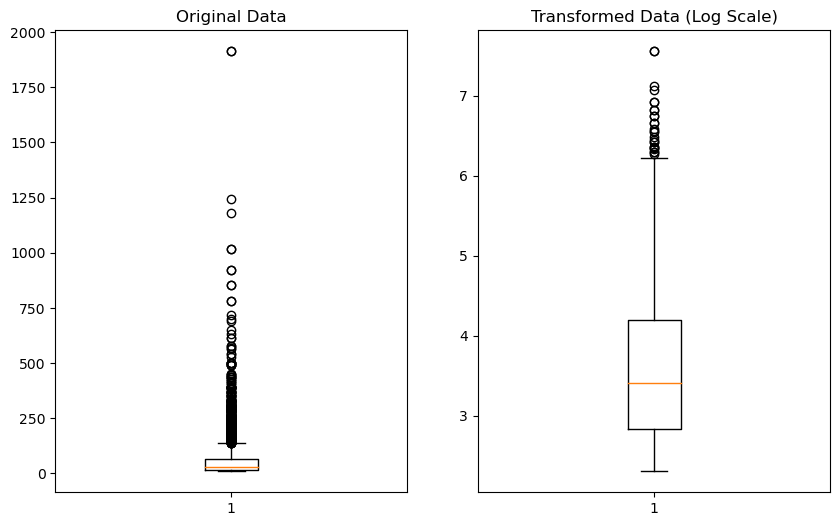

In [16]:
"""Log transformation is particularly effective for right-skewed data, as it compresses larger values more than smaller ones.
This helps to spread out the data and make the distribution more symmetric.
Log transformation is commonly used in health data analysis, especially for variables such as income, 
biomarker measurements, or other health-related indicators."""


# Example dataset with outliers
data = ardi_data_c['Data_Value_Alt']

# Apply log transformation
transformed_data = np.log(ardi_data_c['Data_Value_Alt'])

# Plot boxplots for original and transformed data
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.boxplot(data)
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.boxplot(transformed_data)
plt.title('Transformed Data (Log Scale)')

plt.show()


## DATA EXPLORATION and Visualization

In [17]:
ardi_data_c['Data_Value_Alt'].describe()

count    4127.000000
mean       60.507875
std        96.468573
min        10.000000
25%        17.000000
50%        30.000000
75%        66.000000
max      1913.000000
Name: Data_Value_Alt, dtype: float64

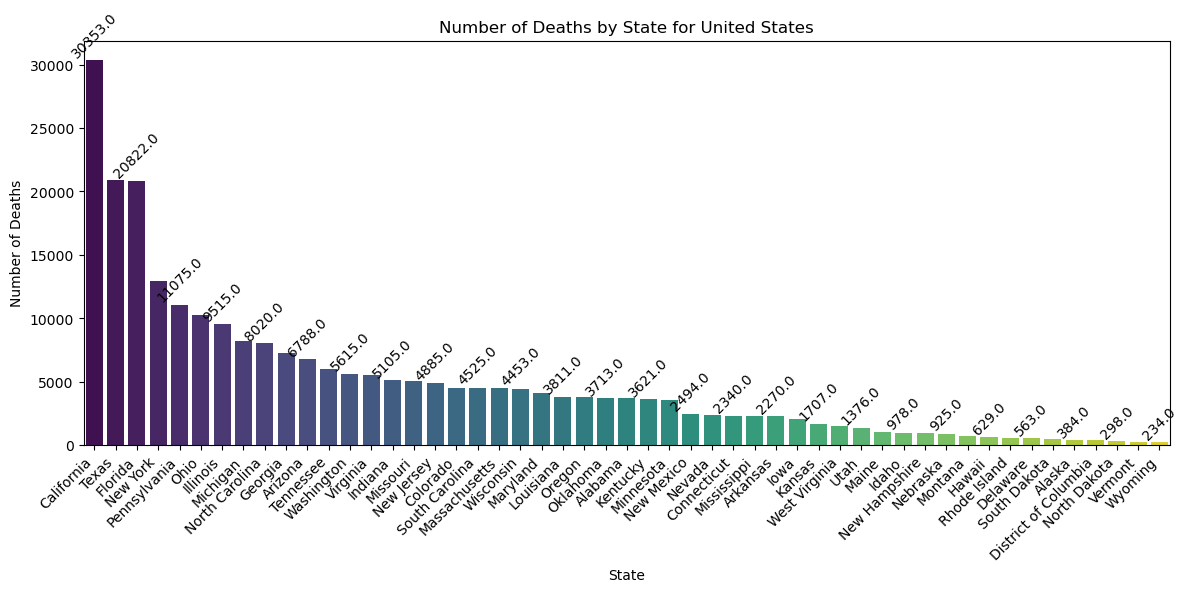

In [61]:


# Filter out the row with state name 'United States'
data_filtered = ardi_data_c[ardi_data_c['LocationDesc'] != 'United States']

# Group data by state and sum the number of deaths
deaths_by_state = data_filtered.groupby('LocationDesc')['Data_Value_Alt'].sum().reset_index()

# Sorting the data by the number of deaths
deaths_by_state = deaths_by_state.sort_values(by='Data_Value_Alt', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='LocationDesc', y='Data_Value_Alt', data=deaths_by_state, palette='viridis')
plt.title('Number of Deaths by State for United States')
plt.xlabel('State')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add annotation in interval of 2 bins
for i in range(0, len(deaths_by_state), 2):
    plt.text(i, deaths_by_state.iloc[i]['Data_Value_Alt'] + 10, str(deaths_by_state.iloc[i]['Data_Value_Alt']), ha='center', va='bottom', rotation=45)

plt.tight_layout()
plt.show()




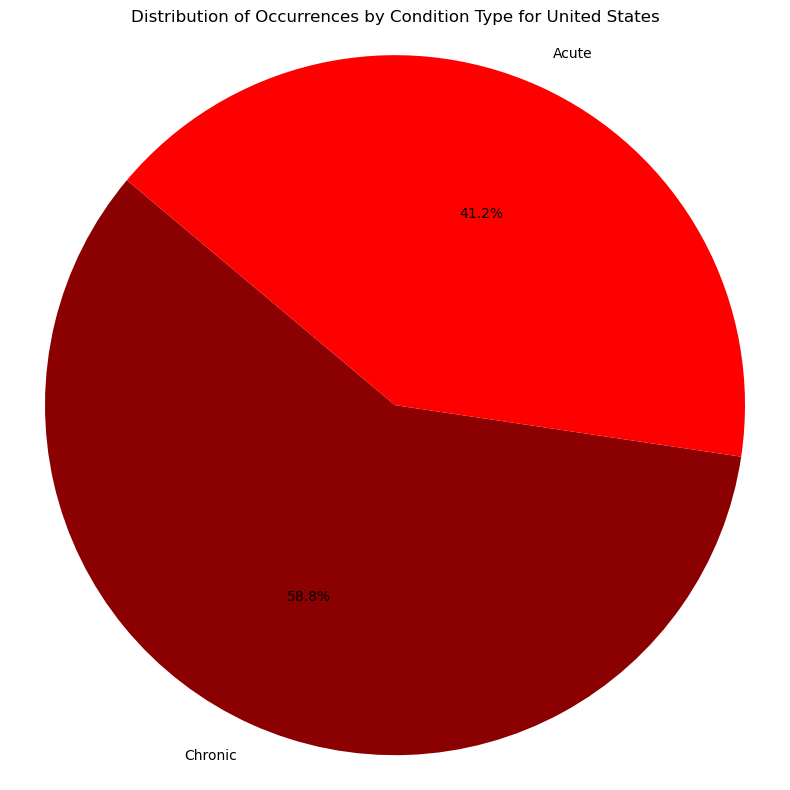

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Count the occurrences of each condition type
condition_counts = ardi_data_c['ConditionType'].value_counts()

plt.figure(figsize=(8, 8))

# Define the custom color palette with red
colors = ['darkred','red']

# Plotting the pie chart with red color
plt.pie(condition_counts, labels=condition_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Occurrences by Condition Type for United States')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout()
plt.show()


# # Grouping and summing data for Cause_of_Death
# total_deaths_by_cause = ardi_data_c.groupby('Cause_of_Death')['Data_Value_Alt'].sum().reset_index()

# plt.figure(figsize=(12, 6))
# # Now you can directly use total_deaths_by_cause as it's correctly formatted
# # Define a custom color palette with a gradient from dark red to light red based on the total number of deaths
# cause_custom_palette = sns.color_palette("Reds_r", len(total_deaths_by_cause))
# ax = sns.barplot(x='Cause_of_Death', y='Data_Value_Alt', data=total_deaths_by_cause, palette=cause_custom_palette)
# plt.title('Number of Deaths by Cause for United States')
# plt.xlabel('Cause of Death')
# plt.ylabel('Number of Deaths')
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# # Correcting the annotation loop
# # Note: Adjust the "+ 10" in the y parameter if the annotations don't fit well visually
# for i, (cause, total) in enumerate(zip(total_deaths_by_cause['Cause_of_Death'], total_deaths_by_cause['Data_Value_Alt'])):
#     plt.text(i, total + 10, str(round(total, 2)), ha='center', va='bottom', rotation=45)

# plt.tight_layout()
# plt.show()


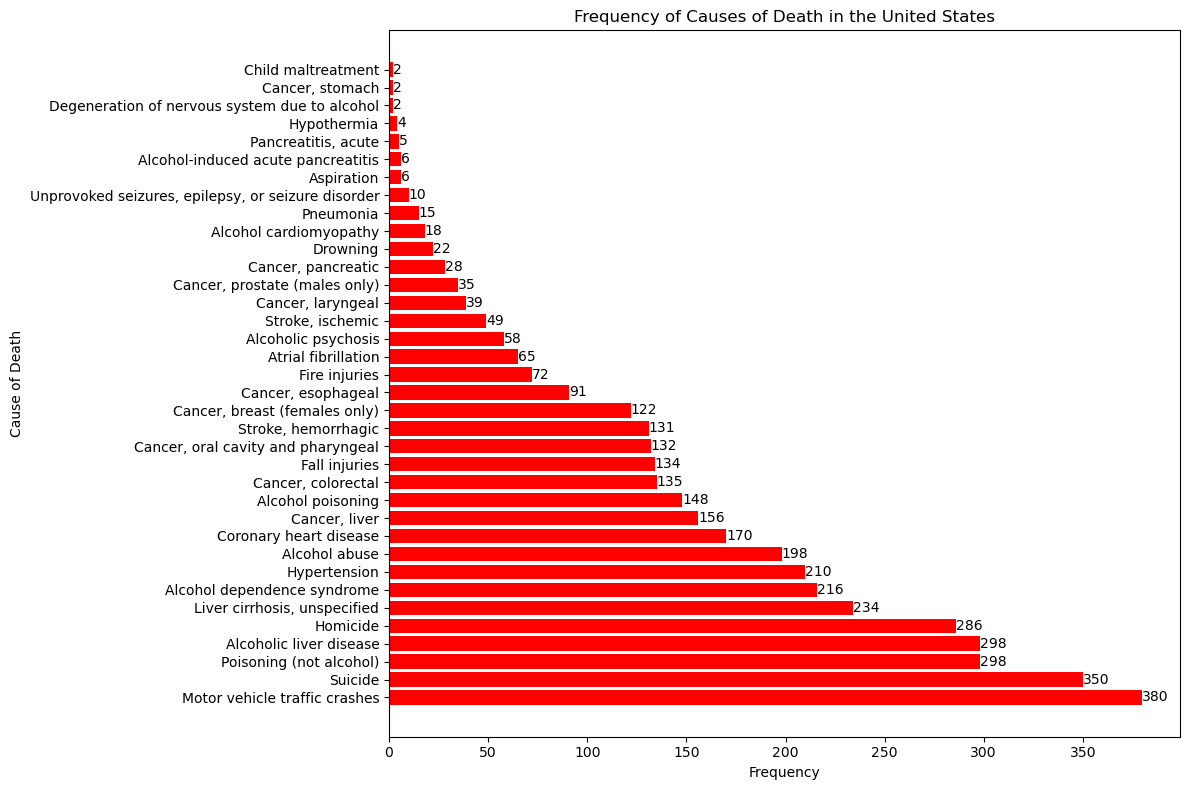

In [60]:
import matplotlib.pyplot as plt

# Count the occurrences of each cause of death
cause_counts = ardi_data_c['Cause_of_Death'].value_counts()

plt.figure(figsize=(12, 8))

# Plotting the horizontal bar plot
bars = plt.barh(cause_counts.index, cause_counts.values, color='red')

plt.title('Frequency of Causes of Death in the United States')
plt.xlabel('Frequency')
plt.ylabel('Cause of Death')

# Adding annotations to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{int(bar.get_width())}', 
             va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()
plt.show()


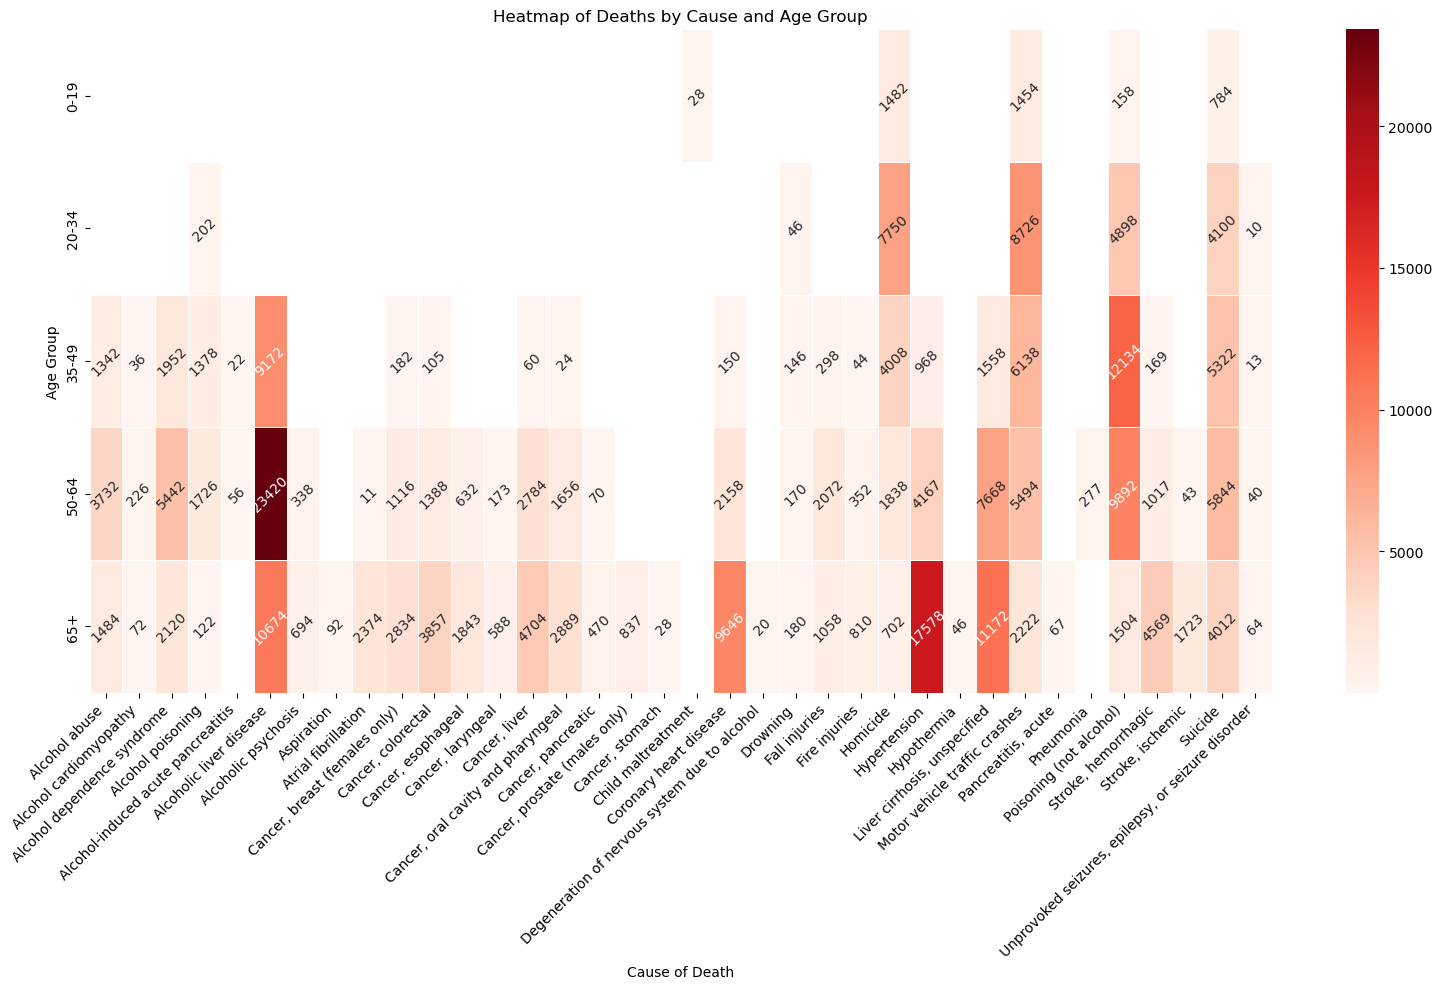

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming ardi_data_c contains the relevant data

# Grouping and summing data for deaths by cause and age group
deaths_heatmap_data = ardi_data_c.groupby(['Cause_of_Death', 'AgeGroup'])['Data_Value_Alt'].sum().reset_index()

# Pivot the data to create a matrix for the heatmap
heatmap_matrix = deaths_heatmap_data.pivot(index='AgeGroup', columns='Cause_of_Death', values='Data_Value_Alt')

# Create the heatmap with larger figure size
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(heatmap_matrix, cmap='Reds', annot=True, fmt='g', linewidths=0.5)

# Customize labels and title
plt.title('Heatmap of Deaths by Cause and Age Group')
plt.xlabel('Cause of Death')
plt.ylabel('Age Group')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Rotate annotations further
for _, text in enumerate(heatmap.texts):
    text.set_rotation(45)

plt.tight_layout()  # Adjust layout to prevent overlap

plt.show()


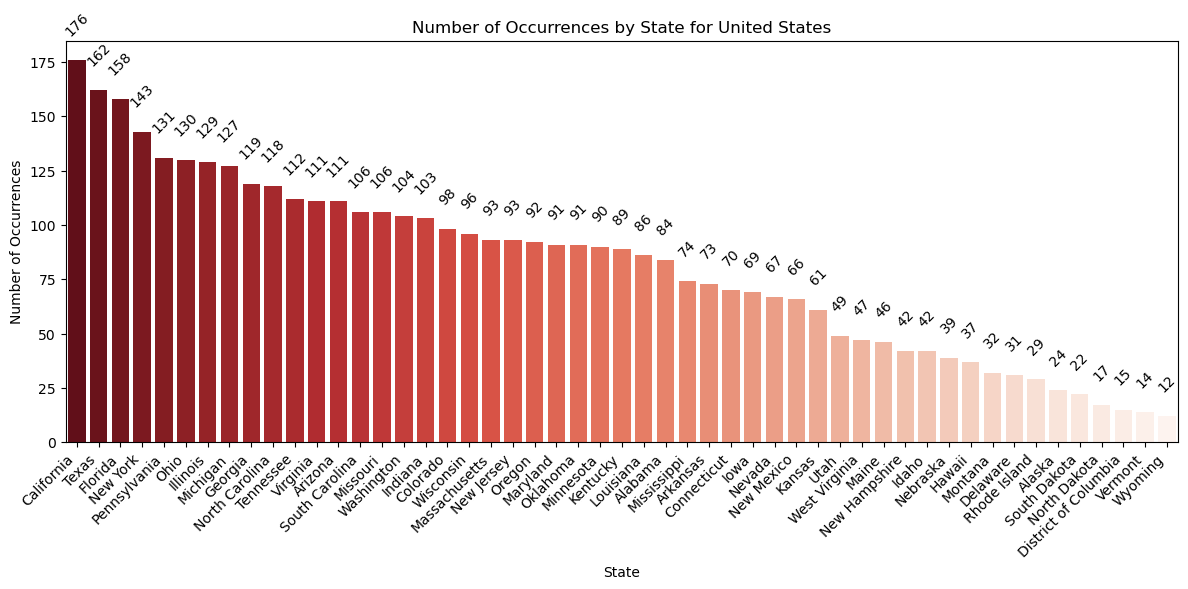

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each state
state_counts = ardi_data_c['LocationDesc'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index, y=state_counts.values, palette='Reds_r')
plt.title('Number of Occurrences by State for United States')
plt.xlabel('State')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add annotations
for i, count in enumerate(state_counts.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', rotation=45)

plt.tight_layout()
plt.show()


In [19]:
# # from sklearn.preprocessing import LabelEncoder

# # # Assuming your DataFrame is named df

# # # Initialize the label encoder
# # label_encoder = LabelEncoder()

# # # Fit and transform the 'ConditionType' column to encode it
# # ardi_data_c['ConditionType_Encoded'] = label_encoder.fit_transform(ardi_data_c['ConditionType'])

# # # Now 'ConditionType_Encoded' is your NumAttribute
# # plt.figure(figsize=(10, 6))
# # sns.scatterplot(data=ardi_data_c, x='ConditionType_Encoded', y='Data_Value_Alt', hue='ConditionType', palette='viridis')

# # plt.title('Data_Value_Alt vs. Encoded ConditionType')
# # plt.xlabel('Encoded ConditionType')
# # plt.ylabel('Data_Value_Alt')

# # # Displaying the legend outside the plot
# # plt.legend(title='Condition Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# # plt.tight_layout()
# # plt.show()



# plt.figure(figsize=(14, 8))
# sns.violinplot(x='ConditionType', y='Data_Value_Alt', data=ardi_data_c, palette='viridis')
# plt.xticks(rotation=45, ha='right')
# plt.title('Distribution of Deaths by Condition Type (2015-2019)')
# plt.xlabel('Condition Type')
# plt.ylabel('Number of Deaths')
# plt.tight_layout()
# plt.show()


In [20]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
# import geopandas as gpd
# import matplotlib.pyplot as plt

# # Assuming your DataFrame is named df and contains relevant columns like LocationDesc and Data_Value_Alt

# # Select relevant features
# X = ardi_data_c[['LocationDesc', 'Data_Value_Alt']]

# # Feature scaling
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X.drop(columns=['LocationDesc']))

# # Clustering
# kmeans = KMeans(n_clusters=5, random_state=42)
# df['Cluster'] = kmeans.fit_predict(X_scaled)

# # Visualization
# # Load US map data
# us_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# # Merge cluster labels with US map data
# us_map = us_map.merge(ardi_data_c[['LocationDesc', 'Cluster']], how='left', left_on='name', right_on='LocationDesc')

# # Plot the map
# fig, ax = plt.subplots(1, 1, figsize=(10, 8))
# us_map.plot(column='Cluster', categorical=True, legend=True, ax=ax, cmap='viridis', edgecolor='black')
# plt.title('Clusters of States with Similar Alcohol-Related Death Rates')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.show()


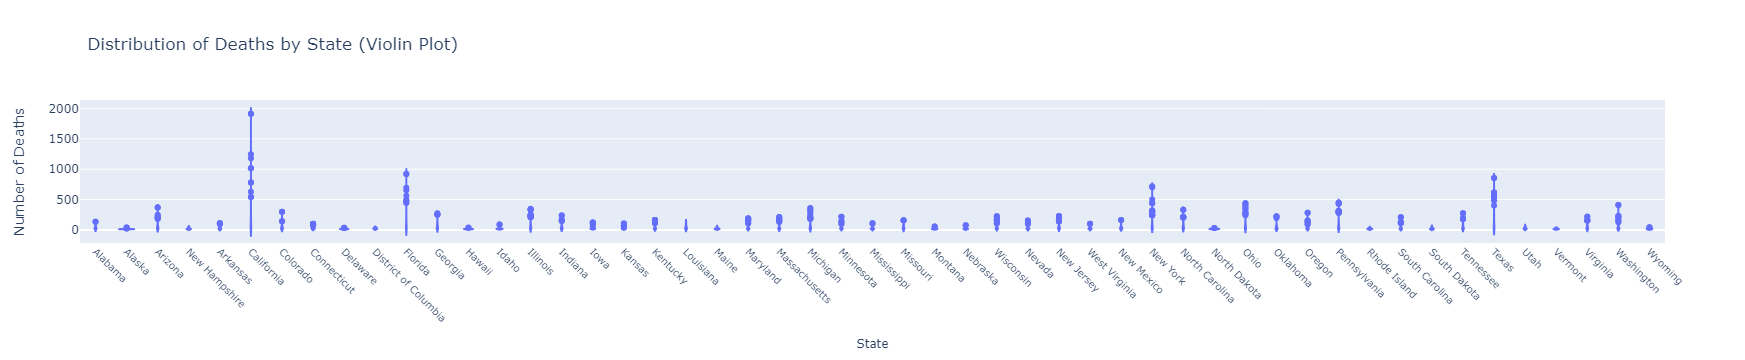

In [21]:
import plotly.express as px

# Create the violin plot
fig = px.violin(data_filtered, x='LocationDesc', y='Data_Value_Alt', title='Distribution of Deaths by State (Violin Plot)', 
                labels={'LocationDesc': 'State', 'Data_Value_Alt': 'Number of Deaths'}, 
                color_discrete_sequence=['#636EFA'])

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=45, tickfont=dict(size=10), title_font=dict(size=12))

# Show the plot
fig.show()


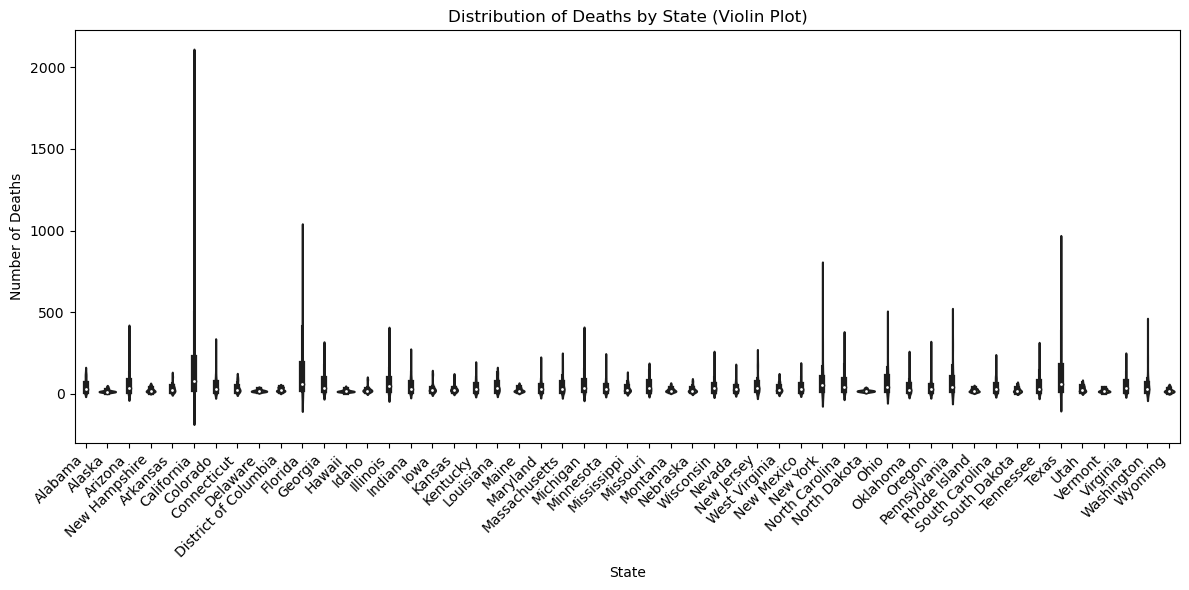

In [21]:
# or
# Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='LocationDesc', y='Data_Value_Alt', data=data_filtered, palette='viridis')
plt.title('Distribution of Deaths by State (Violin Plot)')
plt.xlabel('State')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

   YearStart  YearEnd LocationAbbr LocationDesc DataSource ConditionType  \
0       2015     2019           CA   California       ARDI       Chronic   

                    Category                 Cause_of_Death  Data_Value_Alt  \
0  100% Alcohol-Attributable  Motor vehicle traffic crashes            11.0   

            Effect ConsumptionPattern      Sex AgeGroup  
0  Harmful Effects    Any Alcohol Use  Overall      65+  


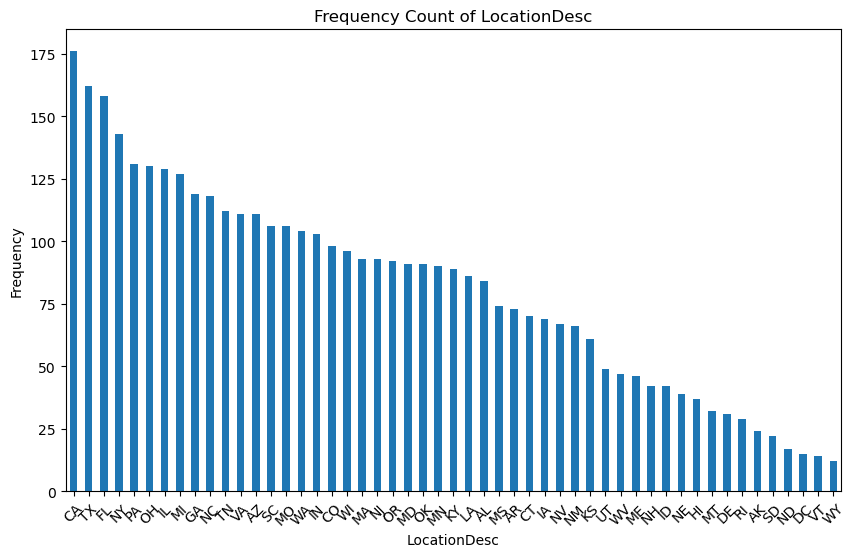

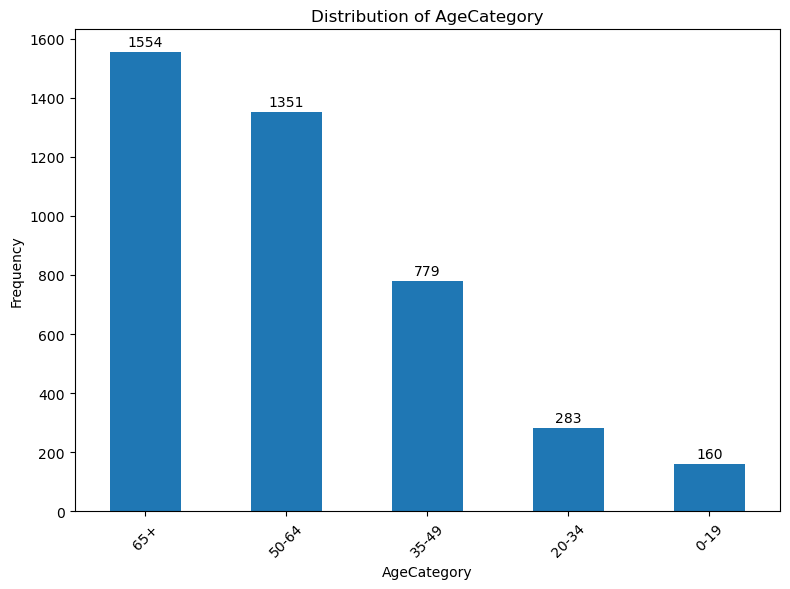

In [22]:
# Calculate mode separately
mode_values = ardi_data_c.mode()
print(mode_values)


# Bar Chart for Frequency Count of 'LocationDesc'
plt.figure(figsize=(10, 6))
ardi_data_c['LocationAbbr'].value_counts().plot(kind='bar')
plt.title('Frequency Count of LocationDesc')
plt.xlabel('LocationDesc')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


# Frequency count of 'AgeCategory' categorical variable (bar chart) with annotation
plt.figure(figsize=(8, 6))
counts = ardi_data_c['AgeGroup'].value_counts()
counts.plot(kind='bar')
plt.title('Distribution of AgeCategory')
plt.xlabel('AgeCategory')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Add annotation
for i, count in enumerate(counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


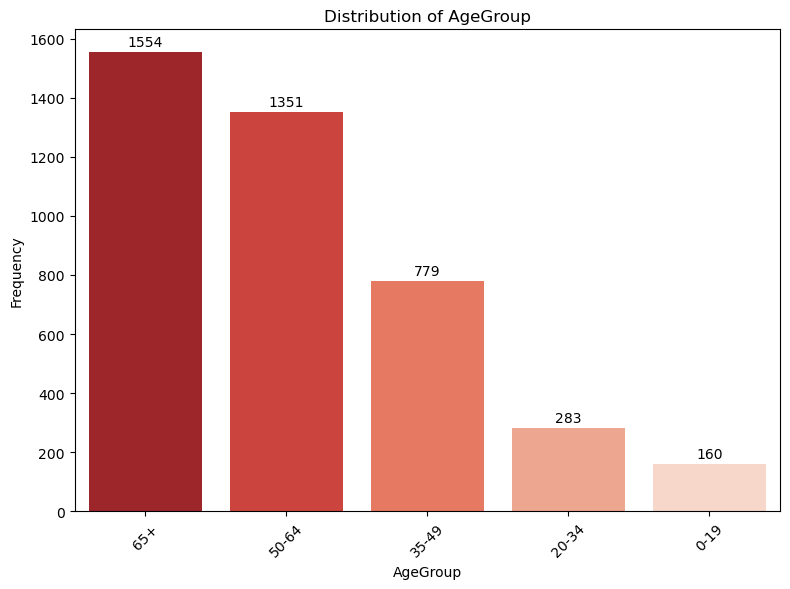

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate frequency count of 'AgeGroup'
age_counts = ardi_data_c['AgeGroup'].value_counts()

# Define a custom color palette with a gradient from dark red to light red based on frequency
custom_palette = sns.color_palette("Reds_r", len(age_counts))

# Plot the bar chart with custom color palette
plt.figure(figsize=(8, 6))
sns.barplot(x=age_counts.index, y=age_counts.values, palette=custom_palette)

# Add annotation
for i, count in enumerate(age_counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

plt.title('Distribution of AgeGroup')
plt.xlabel('AgeGroup')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


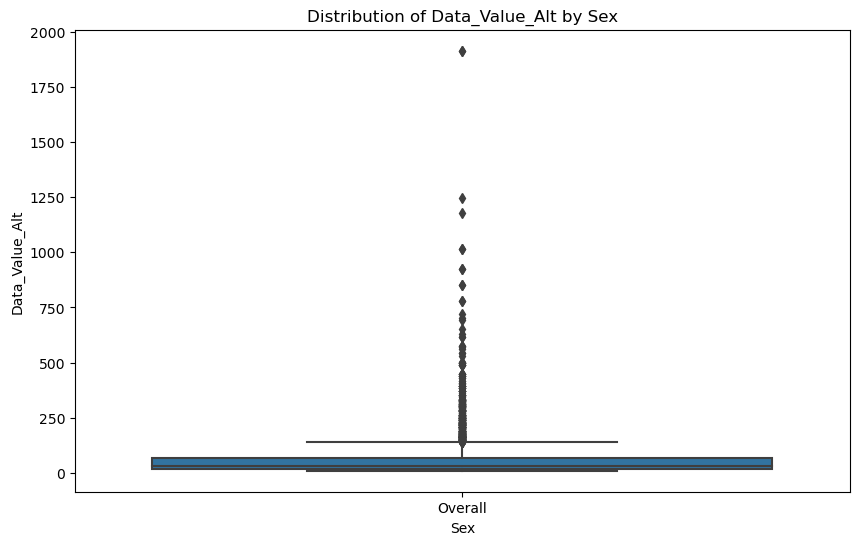

In [23]:
import seaborn as sns

# Box Plot for 'Data_Value_Alt' grouped by 'Sex'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Data_Value_Alt', data=ardi_data_c)
plt.title('Distribution of Data_Value_Alt by Sex')
plt.xlabel('Sex')
plt.ylabel('Data_Value_Alt')
plt.show()


## univarate analysis

In [24]:
ardi_data_c

YearStart  YearEnd LocationAbbr LocationDesc DataSource ConditionType  \
1246        2015     2019           AL      Alabama       ARDI         Acute   
1249        2015     2019           AL      Alabama       ARDI         Acute   
1251        2015     2019           AL      Alabama       ARDI         Acute   
1254        2015     2019           AL      Alabama       ARDI         Acute   
1255        2015     2019           AL      Alabama       ARDI         Acute   
...          ...      ...          ...          ...        ...           ...   
62101       2015     2019           WY      Wyoming       ARDI       Chronic   
62153       2015     2019           WY      Wyoming       ARDI       Chronic   
62154       2015     2019           WY      Wyoming       ARDI       Chronic   
62156       2015     2019           WY      Wyoming       ARDI       Chronic   
62309       2015     2019           WY      Wyoming       ARDI       Chronic   

                            Category                 Cause_of_Death  \
1246      Alcohol-Related Poisonings        Poisoning (not alcohol)   
1249      Alcohol-Related Poisonings        Poisoning (not alcohol)   
1251      Alcohol-Related Poisonings        Poisoning (not alcohol)   
1254   Motor Vehicle Traffic Crashes  Motor vehicle traffic crashes   
1255   Motor Vehicle Traffic Crashes  Motor vehicle traffic crashes   
...                              ...                            ...   
62101      100% Alcohol-Attributable                  Alcohol abuse   
62153      100% Alcohol-Attributable        Alcoholic liver disease   
62154      100% Alcohol-Attributable        Alcoholic liver disease   
62156      100% Alcohol-Attributable        Alcoholic liver disease   
62309       Heart Disease and Stroke                   Hypertension   

       Data_Value_Alt           Effect     ConsumptionPattern      Sex  \
1246             10.0  Harmful Effects  Excessive Alcohol Use  Overall   
1249             54.0  Harmful Effects  Excessive Alcohol Use  Overall   
1251             82.0  Harmful Effects  Excessive Alcohol Use  Overall   
1254            115.0  Harmful Effects  Excessive Alcohol Use  Overall   
1255             23.0  Harmful Effects  Excessive Alcohol Use  Overall   
...               ...              ...                    ...      ...   
62101            12.0  Harmful Effects        Any Alcohol Use  Overall   
62153            14.0  Harmful Effects        Any Alcohol Use  Overall   
62154            24.0  Harmful Effects        Any Alcohol Use  Overall   
62156            43.0  Harmful Effects        Any Alcohol Use  Overall   
62309            11.0  Harmful Effects        Any Alcohol Use  Overall   

      AgeGroup  
1246       65+  
1249     50-64  
1251     35-49  
1254     20-34  
1255      0-19  
...        ...  
62101    50-64  
62153      65+  
62154    35-49  
62156    50-64  
62309      65+  

[4127 rows x 13 columns]

In [30]:
import pandas as pd
import matplotlib.pyplot as plt


# Summary statistics
summary_stats = ardi_data_c["Data_Value_Alt"].describe()
print(summary_stats)

# Distribution analysis
plt.figure(figsize=(10, 6))
plt.hist(ardi_data_c["Data_Value_Alt"], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Alcohol-attributable deaths')
plt.ylabel('Frequency')
plt.title('Distribution of Alcohol-attributable deaths')
plt.grid(True)
plt.show()

# Frequency analysis - by location
location_counts = ardi_data_c['LocationAbbr'].value_counts()
plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar', color='lightgreen')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.title('Frequency of Alcohol-attributable deaths by Location')
plt.xticks(rotation=45)
plt.grid(axis='y')


plt.show()

# # Frequency analysis - by year
# year_counts = ardi_data_c['YearStart'].value_counts()
# plt.figure(figsize=(10, 6))
# year_counts.plot(kind='bar', color='salmon')
# plt.xlabel('Year')
# plt.ylabel('Frequency')
# plt.title('Frequency of Alcohol-attributable deaths by Year')
# plt.xticks(rotation=45)
# plt.grid(axis='y')
# plt.show()

# # Frequency analysis - by sex
# sex_counts = ardi_data_c['Sex'].value_counts()
# plt.figure(figsize=(6, 6))
# sex_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
# plt.title('Frequency of Alcohol-attributable deaths by Sex')
# plt.ylabel('')
# plt.show()

# Frequency analysis - by age group
age_counts = ardi_data_c['AgeGroup'].value_counts()
plt.figure(figsize=(10, 6))

age_counts.plot(kind='bar', color='gold')
plt.figure(figsize=(8, 6))
counts = ardi_data_c['AgeGroup'].value_counts()
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Frequency of Alcohol-attributable deaths by Age Group')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


SyntaxError: invalid syntax (2775791694.py, line 56)

## bivaraite analysis

In [26]:
# import plotly.express as px

# # Correlation analysis
# correlation_matrix = ardi_data_c.corr()

# # Visualize correlation matrix
# fig = px.imshow(correlation_matrix, color_continuous_scale='icefire')
# fig.update_layout(title='Correlation Matrix', width=600, height=500)
# fig.show()

# # Comparison analysis - compare alcohol-attributable deaths between male and female
# fig = px.box(ardi_data_c, x='Sex', y='Data_Value_Alt', color='Sex', title='Comparison of Alcohol-attributable deaths between Male and Female')
# fig.update_xaxes(title='Sex')
# fig.update_yaxes(title='Alcohol-attributable deaths')
# fig.show()

# # Comparison analysis - compare alcohol-attributable deaths between different age groups
# fig = px.violin(ardi_data_c, x='AgeGroup', y='Data_Value_Alt', color='AgeGroup', title='Comparison of Alcohol-attributable deaths between Different Age Groups')
# fig.update_xaxes(title='Age Group')
# fig.update_yaxes(title='Alcohol-attributable deaths')
# fig.show()
# import plotly.express as px

# # Location vs. Alcohol-attributable Deaths
# fig_location = px.bar(ardi_data_c, x='LocationDesc', y='Data_Value_Alt', title='Average Alcohol-attributable Deaths by Location')
# fig_location.update_xaxes(title='Location')
# fig_location.update_yaxes(title='Average Alcohol-attributable Deaths')
# fig_location.show()

# # Age Group vs. Alcohol-attributable Deaths
# fig_age = px.bar(ardi_data_c, x='AgeGroup', y='Data_Value_Alt', title='Average Alcohol-attributable Deaths by Age Group')
# fig_age.update_xaxes(title='Age Group')
# fig_age.update_yaxes(title='Average Alcohol-attributable Deaths')
# fig_age.show()

# # Cause of Death vs. Alcohol-attributable Deaths
# fig_cause = px.bar(ardi_data_c, x='Cause_of_Death', y='Data_Value_Alt', title='Average Alcohol-attributable Deaths by Cause of Death')
# fig_cause.update_xaxes(title='Cause of Death')
# fig_cause.update_yaxes(title='Average Alcohol-attributable Deaths')
# fig_cause.show()

# # Condition Type vs. Alcohol-attributable Deaths
# fig_condition = px.bar(ardi_data_c, x='ConditionType', y='Data_Value_Alt', title='Average Alcohol-attributable Deaths by Condition Type')
# fig_condition.update_xaxes(title='Condition Type')
# fig_condition.update_yaxes(title='Average Alcohol-attributable Deaths')
# fig_condition.show()

# # Effect vs. Alcohol-attributable Deaths
# fig_effect = px.bar(ardi_data_c, x='Effect', y='Data_Value_Alt', title='Average Alcohol-attributable Deaths by Effect')
# fig_effect.update_xaxes(title='Effect')
# fig_effect.update_yaxes(title='Average Alcohol-attributable Deaths')
# fig_effect.show()

# # Consumption Pattern vs. Alcohol-attributable Deaths
# fig_consumption = px.bar(ardi_data_c, x='ConsumptionPattern', y='Data_Value_Alt', title='Average Alcohol-attributable Deaths by Consumption Pattern')
# fig_consumption.update_xaxes(title='Consumption Pattern')
# fig_consumption.update_yaxes(title='Average Alcohol-attributable Deaths')
# fig_consumption.show()



## multi variate analysis

In [27]:
# from sklearn.preprocessing import LabelEncoder

# # Initialize LabelEncoder
# label_encoder = LabelEncoder()

# # Encode categorical columns
# categorical_cols = ['LocationDesc', 'DataSource', 'ConditionType', 'Category', 
#                     'Cause_of_Death', 'Effect', 'ConsumptionPattern', 'AgeGroup_Cat']
# for col in categorical_cols:
#     ardi_data_c[col] = label_encoder.fit_transform(ardi_data_c[col])

# # Now, let's proceed with the Random Forest Regressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# # Splitting the data into training and testing sets
# X = ardi_data_c.drop(columns=['Data_Value_Alt'])
# y = ardi_data_c['Data_Value_Alt']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initializing the Random Forest Regressor
# rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# # Fitting the model
# rf_regressor.fit(X_train, y_train)

# # Making predictions
# y_pred_train = rf_regressor.predict(X_train)
# y_pred_test = rf_regressor.predict(X_test)

# # Evaluating the model
# train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
# test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

# print("Train RMSE:", train_rmse)
# print("Test RMSE:", test_rmse)


In [28]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor

# # Define the hyperparameters grid
# param_grid = {
#     'n_estimators': [50, 100],
#     'max_depth': [None, 10],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2]
# }

# # Create the Random Forest Regressor
# rf_regressor = RandomForestRegressor(random_state=42)

# # Perform Grid Search with Cross-Validation
# grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, 
#                            cv=5, scoring='neg_root_mean_squared_error', verbose=2, n_jobs=-1)

# # Fit the grid search to the data
# grid_search.fit(X_train, y_train)

# # Get the best parameters and best estimator
# best_params = grid_search.best_params_
# best_estimator = grid_search.best_estimator_

# # Print the best parameters
# print("Best Parameters:", best_params)

# # Use the best estimator to make predictions
# y_train_pred = best_estimator.predict(X_train)
# y_test_pred = best_estimator.predict(X_test)

# # Calculate RMSE
# train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
# test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

# print("Train RMSE:", train_rmse)
# print("Test RMSE:", test_rmse)


In [29]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVR
# import xgboost as xgb

# # Define the hyperparameters grid for XGBoost
# xgb_param_grid = {
#     'n_estimators': [50, 100],
#     'max_depth': [3, 6],
#     'learning_rate': [0.1, 0.01]
# }

# # Create the XGBoost regressor
# xgb_regressor = xgb.XGBRegressor(random_state=42)

# # Perform Grid Search with Cross-Validation for XGBoost
# xgb_grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=xgb_param_grid, 
#                                cv=5, scoring='neg_root_mean_squared_error', verbose=2, n_jobs=-1)

# # Fit the grid search to the data for XGBoost
# xgb_grid_search.fit(X_train, y_train)

# # Get the best parameters and best estimator for XGBoost
# best_xgb_params = xgb_grid_search.best_params_
# best_xgb_estimator = xgb_grid_search.best_estimator_

# # Print the best parameters for XGBoost
# print("Best Parameters for XGBoost:", best_xgb_params)

# # Use the best estimator to make predictions for XGBoost
# y_train_pred_xgb = best_xgb_estimator.predict(X_train)
# y_test_pred_xgb = best_xgb_estimator.predict(X_test)

# # Calculate RMSE for XGBoost
# train_rmse_xgb = mean_squared_error(y_train, y_train_pred_xgb, squared=False)
# test_rmse_xgb = mean_squared_error(y_test, y_test_pred_xgb, squared=False)

# print("Train RMSE for XGBoost:", train_rmse_xgb)
# print("Test RMSE for XGBoost:", test_rmse_xgb)


# # Define the hyperparameters grid for SVR
# svr_param_grid = {
#     'C': [0.1, 1, 10],
#     'epsilon': [0.1, 0.01, 0.001]
# }

# # Create the SVR regressor
# svr_regressor = SVR()

# # Perform Grid Search with Cross-Validation for SVR
# svr_grid_search = GridSearchCV(estimator=svr_regressor, param_grid=svr_param_grid, 
#                                cv=5, scoring='neg_root_mean_squared_error', verbose=2, n_jobs=-1)

# # Fit the grid search to the data for SVR
# svr_grid_search.fit(X_train, y_train)

# # Get the best parameters and best estimator for SVR
# best_svr_params = svr_grid_search.best_params_
# best_svr_estimator = svr_grid_search.best_estimator_

# # Print the best parameters for SVR
# print("Best Parameters for SVR:", best_svr_params)

# # Use the best estimator to make predictions for SVR
# y_train_pred_svr = best_svr_estimator.predict(X_train)
# y_test_pred_svr = best_svr_estimator.predict(X_test)

# # Calculate RMSE for SVR
# train_rmse_svr = mean_squared_error(y_train, y_train_pred_svr, squared=False)
# test_rmse_svr = mean_squared_error(y_test, y_test_pred_svr, squared=False)

# print("Train RMSE for SVR:", train_rmse_svr)
# print("Test RMSE for SVR:", test_rmse_svr)


In [30]:
# import tensorflow as tf
# from sklearn.preprocessing import StandardScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# # Scaling the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Building the Neural Network model
# model = Sequential([
#     Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
#     Dense(64, activation='relu'),
#     Dense(1)
# ])

# model.compile(optimizer='adam', loss='mse')

# # Fit the model
# model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=2)

# # Predict and evaluate the model
# y_train_pred_nn = model.predict(X_train_scaled)
# y_test_pred_nn = model.predict(X_test_scaled)

# # Calculate RMSE
# train_rmse_nn = mean_squared_error(y_train, y_train_pred_nn, squared=False)
# test_rmse_nn = mean_squared_error(y_test, y_test_pred_nn, squared=False)

# print("Train RMSE for NN:", train_rmse_nn)
# print("Test RMSE for NN:", test_rmse_nn)


## PCA and feature selection

In [1]:
# import pandas as pd
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# import matplotlib.pyplot as plt

# # Select features for factor analysis
# features = ['LocationDesc',  'ConditionType', 
#             'Category', 'Cause_of_Death',  'ConsumptionPattern', 
#              'AgeGroup']

# # Extract the features
# X = ardi_data_c[features]

# # Convert categorical variables to dummy variables (one-hot encoding)
# X_encoded = pd.get_dummies(X)

# # Standardize the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_encoded)

# # Perform PCA
# pca = PCA()
# X_pca = pca.fit_transform(X_scaled)

# # Explained variance ratio
# explained_variance_ratio = pca.explained_variance_ratio_
# print(explained_variance_ratio)

# # Plot explained variance ratio
# plt.figure(figsize=(10, 6))
# plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
# plt.xlabel('Principal Components')
# plt.ylabel('Explained Variance Ratio')
# plt.title('Explained Variance Ratio by Principal Components')

# # Adding annotations
# for i, ratio in enumerate(explained_variance_ratio):
#     plt.text(i + 1, ratio + 0.01, f'{ratio:.2f}', ha='center')

# plt.show()


In [2]:
# # Get the loadings of each feature on the principal components
# loadings = pca.components_

# # Create a DataFrame to display the loadings
# loadings_df = pd.DataFrame(loadings, columns=X_encoded.columns)

# # Print the loadings for each principal component
# for i, pc_loadings in enumerate(loadings_df.iterrows(), start=1):
#     print(f"Principal Component {i} Loadings:")
#     print(pc_loadings[1].sort_values(ascending=False))
#     print()


## clustering and data processing for machince learning

In [33]:
# df = pd.read_csv("Cleaned_1_data.csv")
# df



In [34]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

ardi_data = pd.read_csv("Cleaned_1_data.csv")


# Selecting relevant features
cluster_data = ardi_data[['LocationAbbr', 'Data_Value_Alt']].copy()  # not changing original Data

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(cluster_data[['Data_Value_Alt']])

# Perform K-means clustering
kmeans = KMeans(n_clusters=5)  
kmeans.fit(normalized_data)

# Add cluster labels to the DataFrame using .loc
cluster_data.loc[:, 'Cluster'] = kmeans.labels_

# Export clustered data to CSV
cluster_data.to_csv('clustered_data.csv', index=False)

# Merge with original data to get state names
merged_data = pd.merge(cluster_data, ardi_data[['LocationAbbr', 'LocationDesc']], on='LocationAbbr')

# Calculate range of death values for each cluster
cluster_ranges = merged_data.groupby(['LocationDesc', 'Cluster'])['Data_Value_Alt'].agg(['min', 'max'])

# Print the range for each cluster by state
print("Range of Death Values for Each Cluster by State:")
print(cluster_ranges)


Range of Death Values for Each Cluster by State:
                         min    max
LocationDesc  Cluster              
Alabama       0         10.0   62.0
              4         68.0  133.0
Alaska        0         11.0   41.0
Arizona       0         10.0   53.0
              2        207.0  369.0
...                      ...    ...
West Virginia 4         72.0  101.0
Wisconsin     0         10.0   61.0
              2        226.0  226.0
              4         69.0  177.0
Wyoming       0         11.0   43.0

[118 rows x 2 columns]


In [35]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Read the cleaned data
ardi_data = pd.read_csv("Cleaned_1_data.csv")

# Selecting relevant features for clustering
cluster_data = ardi_data[['LocationAbbr', 'Data_Value_Alt']].copy()

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(cluster_data[['Data_Value_Alt']])

# Perform K-means clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(normalized_data)

# Add cluster labels to the DataFrame using .loc
cluster_data.loc[:, 'Cluster'] = kmeans.labels_

# Merge with original data to get state names
merged_data = pd.merge(cluster_data, ardi_data[['LocationAbbr', 'LocationDesc']], on='LocationAbbr')

# Calculate the average cluster for each state
state_avg_cluster = merged_data.groupby('LocationDesc')['Cluster'].mean().reset_index()

# Rename columns for clarity
state_avg_cluster.columns = ['LocationDesc', 'Avg_Cluster']

# Create a DataFrame with unique states
cluster_map = pd.DataFrame({'LocationDesc': merged_data['LocationDesc'].unique()})

# Merge with the average cluster data
cluster_map = pd.merge(cluster_map, state_avg_cluster, on='LocationDesc', how='left')

# Round the Avg_Cluster column to whole numbers
cluster_map['Avg_Cluster'] = cluster_map['Avg_Cluster'].round()

# Print the DataFrame
print(cluster_map)


            LocationDesc  Avg_Cluster
0                Alabama          0.0
1                 Alaska          0.0
2                Arizona          1.0
3          New Hampshire          0.0
4               Arkansas          0.0
5             California          1.0
6               Colorado          1.0
7            Connecticut          0.0
8               Delaware          0.0
9   District of Columbia          0.0
10               Florida          1.0
11               Georgia          1.0
12                Hawaii          0.0
13                 Idaho          0.0
14              Illinois          1.0
15               Indiana          0.0
16                  Iowa          0.0
17                Kansas          0.0
18              Kentucky          0.0
19             Louisiana          0.0
20                 Maine          0.0
21              Maryland          0.0
22         Massachusetts          0.0
23              Michigan          1.0
24             Minnesota          0.0
25          

In [36]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Read the cleaned data
ardi_data = pd.read_csv("Cleaned_1_data.csv")

# Selecting relevant features for clustering
cluster_data = ardi_data[['LocationAbbr', 'Data_Value_Alt']].copy()

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(cluster_data[['Data_Value_Alt']])

# Perform K-means clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(normalized_data)

# Add cluster labels to the DataFrame using .loc
cluster_data.loc[:, 'Cluster'] = kmeans.labels_

# Merge with original data to get state names
merged_data = pd.merge(cluster_data, ardi_data[['LocationAbbr', 'LocationDesc']], on='LocationAbbr')

# Find the index of the highest cluster for each state
highest_cluster_idx = merged_data.groupby('LocationDesc')['Cluster'].idxmax()

# Extract the rows with the highest cluster for each state
highest_cluster_states = merged_data.loc[highest_cluster_idx]

# Select only the LocationDesc and Cluster columns
cluster_map = highest_cluster_states[['LocationDesc', 'Cluster']]

# Print the DataFrame
print(cluster_map)


                LocationDesc  Cluster
0                    Alabama        2
7056                  Alaska        2
7632                 Arizona        2
21717               Arkansas        2
34966             California        4
58022               Colorado        2
67626            Connecticut        2
72526               Delaware        2
73487   District of Columbia        2
80348                Florida        3
98676                Georgia        2
112837                Hawaii        2
114206                 Idaho        2
115970              Illinois        2
132611               Indiana        2
143220                  Iowa        2
147981                Kansas        2
151702              Kentucky        2
159623             Louisiana        2
167019                 Maine        2
169135              Maryland        2
177416         Massachusetts        2
186065              Michigan        2
202194             Minnesota        2
210294           Mississippi        2
215770      

In [37]:
# Save the DataFrame to a CSV file without adding another index
cluster_map.to_csv('cluster_map.csv', index=False)

cluster_data

LocationAbbr  Data_Value_Alt  Cluster
0              AL            10.0        2
1              AL            54.0        2
2              AL            82.0        0
3              AL           115.0        0
4              AL            23.0        2
...           ...             ...      ...
4122           WY            12.0        2
4123           WY            14.0        2
4124           WY            24.0        2
4125           WY            43.0        2
4126           WY            11.0        2

[4127 rows x 3 columns]

In [38]:
# cluster_ranges

## Feature selection

Cause_of_Death: 0.3241
LocationDesc: 0.2018
LocationAbbr: 0.1999
AgeGroup: 0.1685
Category: 0.0619
ConditionType: 0.0220
ConsumptionPattern: 0.0218
YearStart: 0.0000
YearEnd: 0.0000
DataSource: 0.0000
Effect: 0.0000
Sex: 0.0000


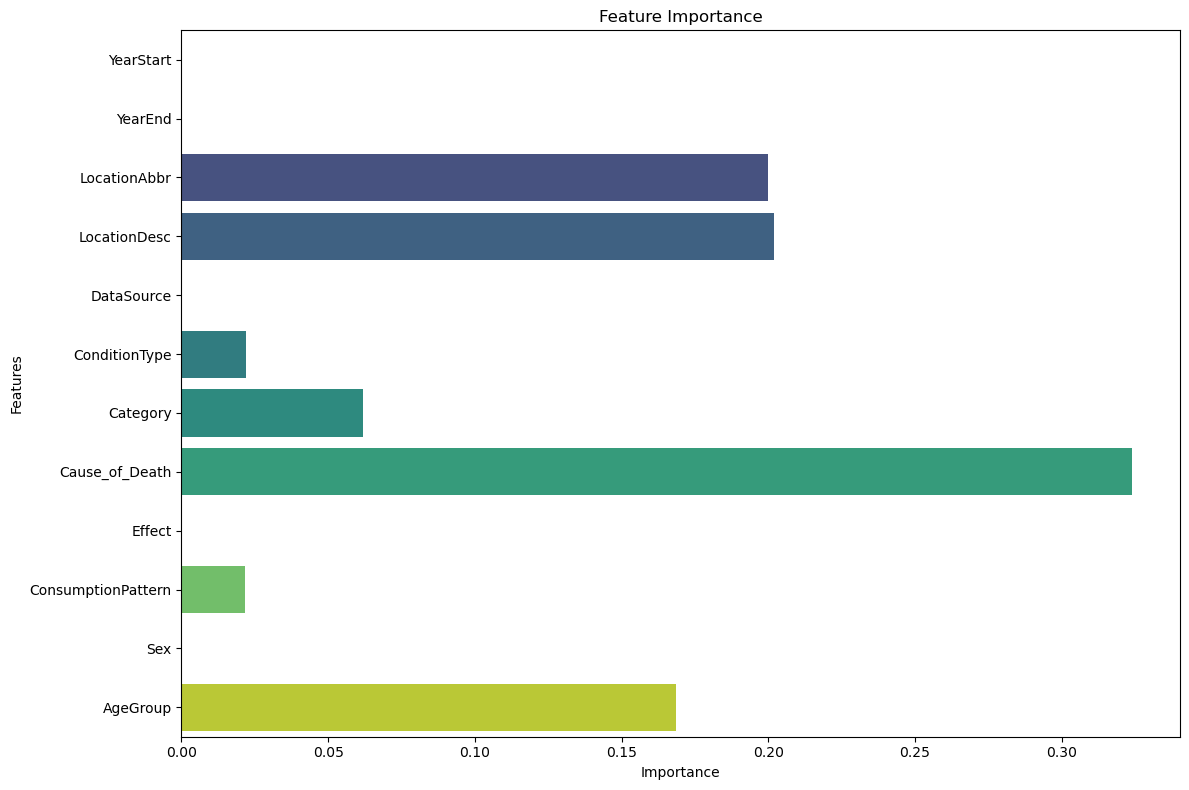

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume 'ardi_data_c' is a predefined DataFrame with appropriate columns

# Now proceed with encoding the categorical columns
categorical_columns = ['LocationAbbr', 'LocationDesc', 'DataSource', 'ConditionType', 'Category', 'Cause_of_Death', 'Effect', 'ConsumptionPattern', 'Sex', 'AgeGroup']

label_encoders = {}  # To store the label encoders for each categorical column
for col in categorical_columns:
    le = LabelEncoder()
    ardi_data_c[col] = le.fit_transform(ardi_data_c[col].astype(str))
    label_encoders[col] = le

# Assuming 'Data_Value_Alt' is the target variable and already numeric
X = ardi_data_c.drop(['Data_Value_Alt'], axis=1)  # Exclude target variable
y = ardi_data_c['Data_Value_Alt']

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForestRegressor for Feature Importance
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances
importances = rf_model.feature_importances_
features = X.columns

# Print each feature with its corresponding importance
feature_importance_dict = dict(zip(features, importances))
for feature, importance in sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True):
    print(f"{feature}: {importance:.4f}")

# Plotting Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [40]:
ardi_data_c.to_csv("encoded_data.csv")

In [41]:
ardi_data_c.describe()

YearStart  YearEnd  LocationAbbr  LocationDesc  DataSource  \
count     4127.0   4127.0   4127.000000   4127.000000      4127.0   
mean      2015.0   2019.0     24.574752     24.574994         0.0   
std          0.0      0.0     14.436874     14.514343         0.0   
min       2015.0   2019.0      0.000000      0.000000         0.0   
25%       2015.0   2019.0     12.000000     12.000000         0.0   
50%       2015.0   2019.0     24.000000     24.000000         0.0   
75%       2015.0   2019.0     37.000000     37.000000         0.0   
max       2015.0   2019.0     50.000000     50.000000         0.0   

       ConditionType     Category  Cause_of_Death  Data_Value_Alt  Effect  \
count    4127.000000  4127.000000     4127.000000     4127.000000  4127.0   
mean        0.587594     3.098619       18.794524       60.507875     0.0   
std         0.492327     2.475809       11.201302       96.468573     0.0   
min         0.000000     0.000000        0.000000       10.000000     0.0   
25%         0.000000     1.000000        9.000000       17.000000     0.0   
50%         1.000000     3.000000       22.000000       30.000000     0.0   
75%         1.000000     5.000000       28.000000       66.000000     0.0   
max         1.000000     8.000000       35.000000     1913.000000     0.0   

       ConsumptionPattern     Sex     AgeGroup  
count         4127.000000  4127.0  4127.000000  
mean             0.482917     0.0     2.934335  
std              0.499769     0.0     1.088343  
min              0.000000     0.0     0.000000  
25%              0.000000     0.0     2.000000  
50%              0.000000     0.0     3.000000  
75%              1.000000     0.0     4.000000  
max              1.000000     0.0     4.000000

In [42]:
importances


array([0.        , 0.        , 0.1998582 , 0.20179617, 0.        ,
       0.02203104, 0.06192612, 0.32409281, 0.        , 0.02182715,
       0.        , 0.1684685 ])

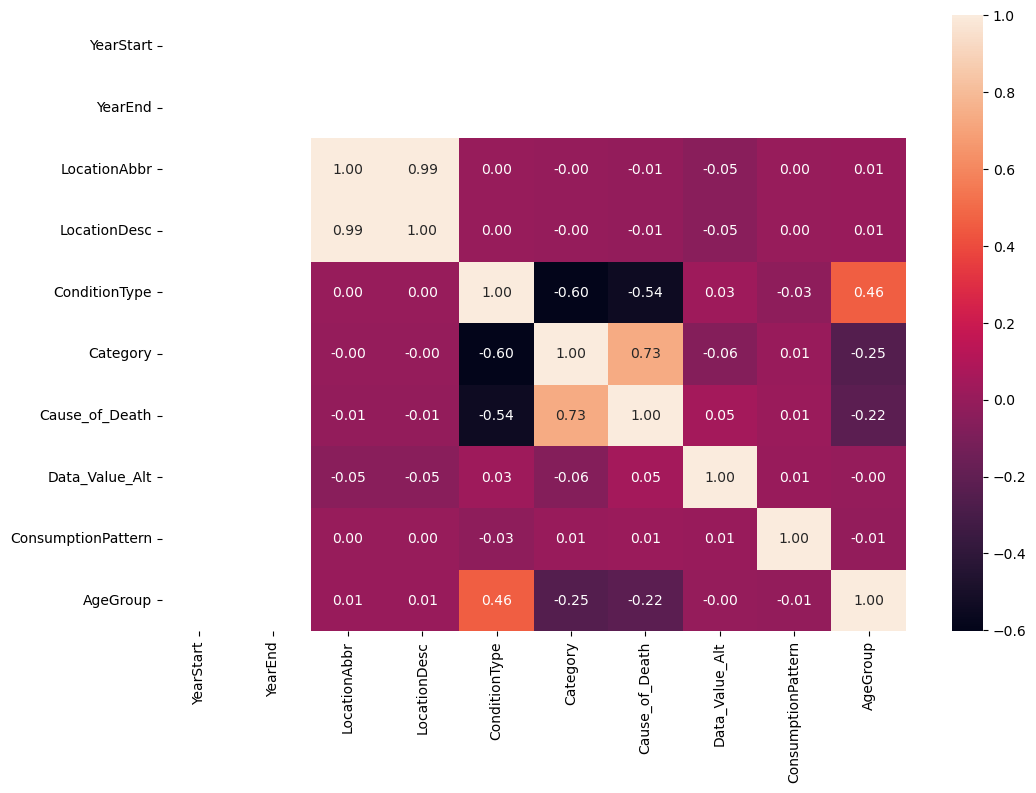

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude 'Datasource' and 'Effect' columns
ardi_data_c_numeric = ardi_data_c.drop(columns=['DataSource', 'Effect', 'Sex'])

# Calculate correlation matrix
corr_matrix = ardi_data_c_numeric.corr()
# corr_matrix
# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()


In [44]:
# Neural network tensorflow

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_columns = ['LocationAbbr','Sex', 'ConditionType', 'AgeGroup','Category','Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data_c[col] = le.fit_transform(ardi_data_c[col])
    label_encoders[col] = le

# Split data into features and target
X = ardi_data_c[['LocationAbbr','Sex', 'ConditionType', 'AgeGroup','Category','Cause_of_Death']].values
y = ardi_data_c['Data_Value_Alt'].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with one neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)  # Adjust epochs and batch size as needed

# Evaluate the model
y_pred = model.predict(X_test).flatten()

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Neural Network Predicted values:", y_pred)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)






26/26 [==============================] - 0s 3ms/step
Neural Network Predicted values: [  8.996327   30.197786   39.464462   86.05197    31.499151    7.8841953
  47.971268   81.91198    43.98702    91.226135   95.50465    90.24151
 100.77411     7.27273    41.765186   73.25614    53.947346   52.29088
  53.375984   53.29057    42.78259    15.285818   73.69973    70.214935
  71.33013    93.92672    53.40234    41.615856  111.1787     99.317726
  31.463377   66.911415   36.856712   35.62223   151.72514    30.917109
   9.647558    8.333686   68.6108     99.61602    68.40536    96.001
  30.606295  107.55903   102.26966    75.3242    102.95476    36.13939
  35.671898   75.05038    39.49641    46.18681   -30.230001   35.225586
  66.56772    23.583368   84.994606   31.885567   92.59245    34.77904
  79.45673    86.81715    87.62194    44.15903    58.40843    71.66165
  -8.824429   50.952496  101.517296   67.839676   96.724075   96.7459
  38.686005   32.435112   86.511795   30.810583   45.79

In [45]:
# Random forest and GradientBoostingRegressor 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_columns = ['LocationAbbr','Sex', 'ConditionType', 'AgeGroup','Category','Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data_c[col] = le.fit_transform(ardi_data_c[col])
    label_encoders[col] = le

# Split data into features and target
X = ardi_data_c[['LocationAbbr','Sex', 'ConditionType','AgeGroup','Category','Cause_of_Death']]
y = ardi_data_c['Data_Value_Alt']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)

# Evaluate Random Forest model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

# Evaluate Gradient Boosting model
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_mae = mean_absolute_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)

# Print results
print("Random Forest Results:")
print("Mean Squared Error (MSE):", rf_mse)
print("Mean Absolute Error (MAE):", rf_mae)
print("R-squared (R2):", rf_r2)
print("\nGradient Boosting Results:")
print("Mean Squared Error (MSE):", gb_mse)
print("Mean Absolute Error (MAE):", gb_mae)
print("R-squared (R2):", gb_r2)


Random Forest Results:
Mean Squared Error (MSE): 1556.281625885855
Mean Absolute Error (MAE): 19.100223985356855
R-squared (R2): 0.8086830066550288

Gradient Boosting Results:
Mean Squared Error (MSE): 5383.169744992795
Mean Absolute Error (MAE): 37.5120402545764
R-squared (R2): 0.33823555251999493


In [46]:
# # Checking outliers

# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt


# # Statistical Methods: Z-Score
# z_scores = np.abs((ardi_data_c['Data_Value_Alt'] - ardi_data_c['Data_Value_Alt'].mean()) / ardi_data_c['Data_Value_Alt'].std())
# outliers_zscore = ardi_data_c[z_scores > 3]  # Threshold of ±3 standard deviations from the mean
# print("Outliers detected using Z-Score method:")
# print(outliers_zscore)


# # Statistical Methods: Interquartile Range (IQR)
# Q1 = ardi_data_c['Data_Value_Alt'].quantile(0.25)
# Q3 = ardi_data_c['Data_Value_Alt'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# outliers_iqr = ardi_data_c[(ardi_data_c['Data_Value_Alt']< lower_bound) | (ardi_data_c['Data_Value_Alt'] > upper_bound)]
# print("\nOutliers detected using IQR method:")
# print(outliers_iqr)


# # Machine Learning Methods: Isolation Forest
# isolation_forest = IsolationForest(contamination='auto')
# isolation_forest.fit(ardi_data_c[['Data_Value_Alt']])
# outliers_isolation_forest = ardi_data_c[isolation_forest.predict(ardi_data_c[['Data_Value_Alt']]) == -1]
# print("\nOutliers detected using Isolation Forest method:")
# print(outliers_isolation_forest)

# # Outlier Detection Algorithms: Local Outlier Factor (LOF)
# from sklearn.neighbors import LocalOutlierFactor
# lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')
# outliers_lof = ardi_data_c[lof.fit_predict(ardi_data_c[['Data_Value_Alt']]) == -1]
# print("\nOutliers detected using LOF method:")
# print(outliers_lof)

# # Outlier Detection Algorithms: Robust Random Cut Forest (RRCF)
# rrcf = IsolationForest(contamination='auto')
# outliers_rrcf = ardi_data_c[rrcf.fit_predict(ardi_data_c[['Data_Value_Alt']]) == -1]
# print("\nOutliers detected using RRCF method:")
# print(outliers_rrcf)


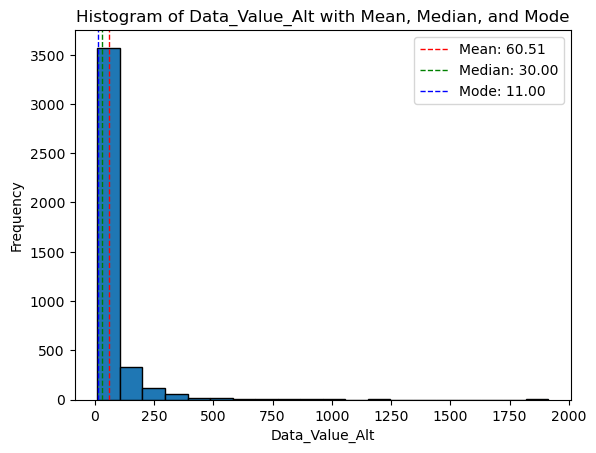

In [47]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the number of bins dynamically
bin_count = min(int(np.sqrt(len(ardi_data_c['Data_Value_Alt']))), 20)  # Adjust the maximum number of bins as needed

# Visual Inspection: Histogram
plt.hist(ardi_data_c['Data_Value_Alt'], bins=bin_count, edgecolor='k')

# Calculate mean, median, and mode
mean_val = np.mean(ardi_data_c['Data_Value_Alt'])
median_val = np.median(ardi_data_c['Data_Value_Alt'])
mode_val = ardi_data_c['Data_Value_Alt'].mode()[0]  # In case there are multiple modes, take the first one

# Add annotations for mean, median, and mode
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_val:.2f}')
plt.axvline(mode_val, color='blue', linestyle='dashed', linewidth=1, label=f'Mode: {mode_val:.2f}')

# Set plot title and labels
plt.title('Histogram of Data_Value_Alt with Mean, Median, and Mode')
plt.xlabel('Data_Value_Alt')
plt.ylabel('Frequency')

# Show legend
plt.legend()

# Show plot
plt.show()


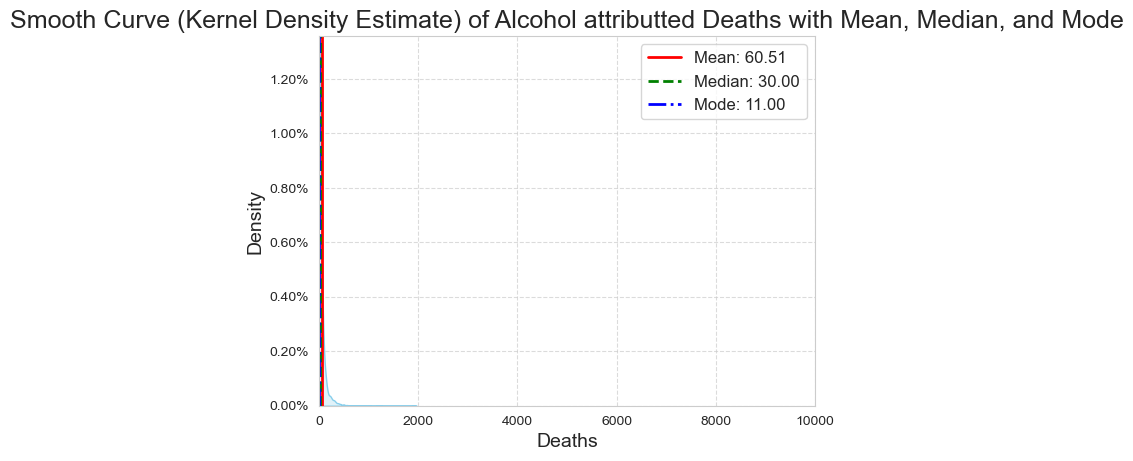

<Figure size 1000x600 with 0 Axes>

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Set style
sns.set_style("whitegrid")

# Visual Inspection: Smooth Curve (Kernel Density Estimate)
sns.kdeplot(ardi_data_c['Data_Value_Alt'], color='skyblue', fill=True)

# Calculate mean, median, and mode
mean_val = ardi_data_c['Data_Value_Alt'].mean()
median_val = ardi_data_c['Data_Value_Alt'].median()
mode_val = ardi_data_c['Data_Value_Alt'].mode()[0]  # In case there are multiple modes, take the first one

# Add annotations for mean, median, and mode
plt.axvline(mean_val, color='red', linestyle='-', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
plt.axvline(mode_val, color='blue', linestyle='-.', linewidth=2, label=f'Mode: {mode_val:.2f}')

# Set plot title and labels
plt.title('Smooth Curve (Kernel Density Estimate) of Alcohol attributted Deaths with Mean, Median, and Mode', fontsize=18)
plt.xlabel('Deaths', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Format y-axis ticks
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

# Set x-axis limits for zooming
plt.xlim(0, 10000)  # Adjust the limits as needed

# Show legend
plt.legend(fontsize=12, loc='upper right')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust figure size
plt.figure(figsize=(10, 6))

# Show plot
plt.show()


## Prediction based on Location

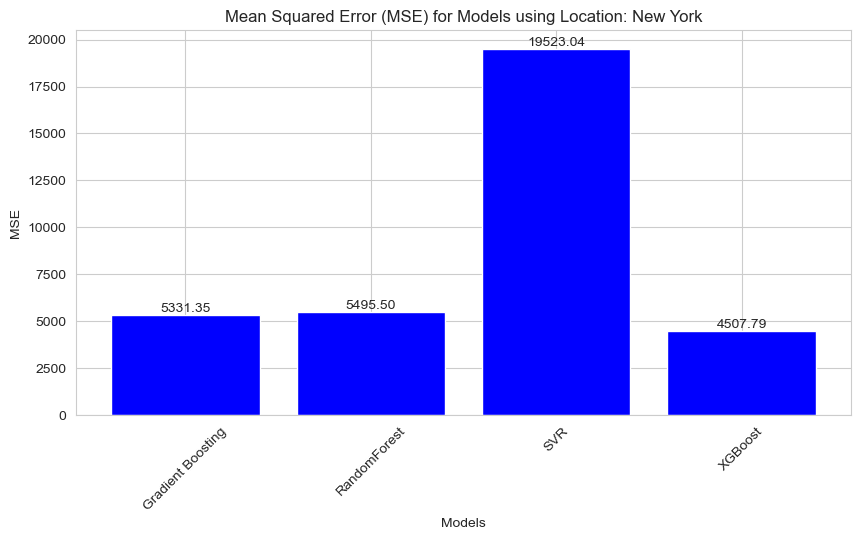

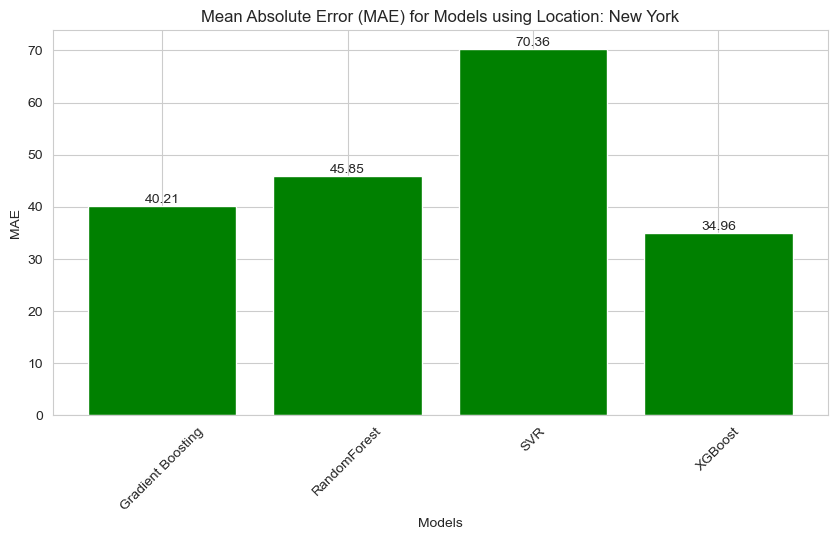

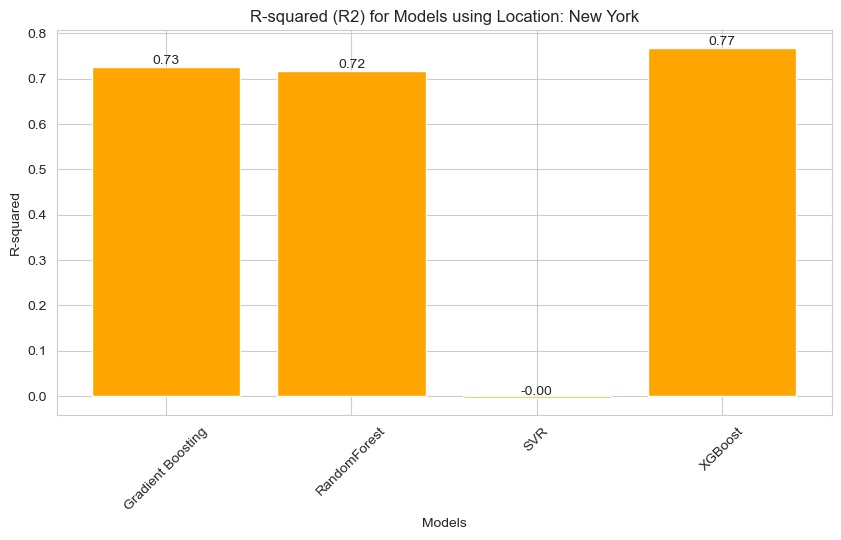

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

def predict_with_models(ardi_data, location):
    # Encode categorical variables
    label_encoders = {}
    categorical_columns = ['AgeGroup', 'ConsumptionPattern', 'ConditionType', 'Category', 'Cause_of_Death']
    
    for col in categorical_columns:
        le = LabelEncoder()
        ardi_data[col] = le.fit_transform(ardi_data[col])
        label_encoders[col] = le

    # Filter data by location
    filtered_data = ardi_data[ardi_data['LocationDesc'] == location]
    
    # Check if there are enough samples for training and testing
    if len(filtered_data) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    # Split data into features and target
    X = filtered_data[['AgeGroup', 'ConsumptionPattern', 'ConditionType', 'Category', 'Cause_of_Death']]
    y = filtered_data['Data_Value_Alt']
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize models
    models = {
        'Gradient Boosting': GradientBoostingRegressor(),
        'RandomForest': RandomForestRegressor(),
        'SVR': SVR(kernel='linear'),
        'XGBoost': XGBRegressor()
    }

    # Make predictions and evaluate each model
    mse_results = {}
    mae_results = {}
    r2_results = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mse_results[model_name] = mse
        mae_results[model_name] = mae
        r2_results[model_name] = r2

    # Plot MSE for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(mse_results.keys(), mse_results.values(), color='blue')
    plt.title(f'Mean Squared Error (MSE) for Models using Location: {location}')
    plt.xlabel('Models')
    plt.ylabel('MSE')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, mse in zip(bars, mse_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mse:.2f}', ha='center', va='bottom')

    plt.show()

    # Plot MAE for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(mae_results.keys(), mae_results.values(), color='green')
    plt.title(f'Mean Absolute Error (MAE) for Models using Location: {location}')
    plt.xlabel('Models')
    plt.ylabel('MAE')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, mae in zip(bars, mae_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mae:.2f}', ha='center', va='bottom')

    plt.show()

    # Plot R-squared for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(r2_results.keys(), r2_results.values(), color='orange')
    plt.title(f'R-squared (R2) for Models using Location: {location}')
    plt.xlabel('Models')
    plt.ylabel('R-squared')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, r2 in zip(bars, r2_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{r2:.2f}', ha='center', va='bottom')

    plt.show()

# Load your ARDI data
ardi_data = pd.read_csv("Cleaned_1_data.csv")

# Specify the location for filtering
location = 'New York'

# Perform prediction with models for the specified location
predict_with_models(ardi_data, location)


## Prediction based on Cause of Death

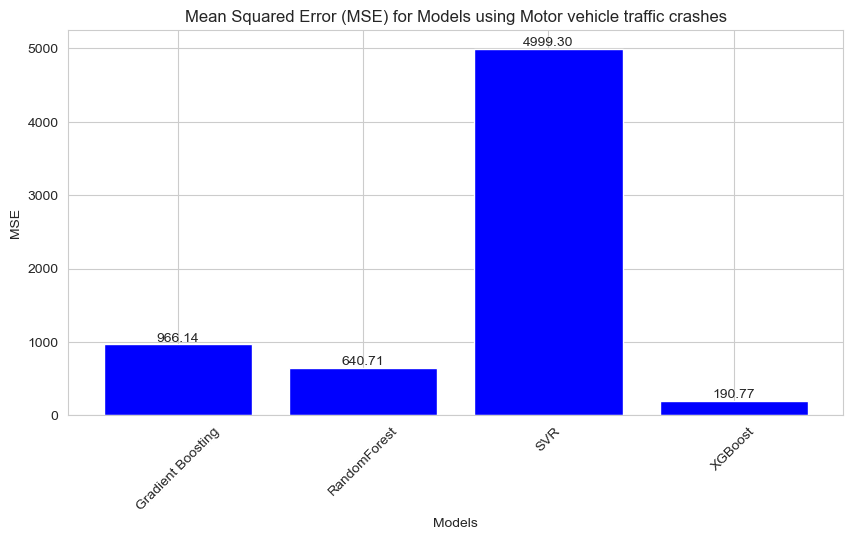

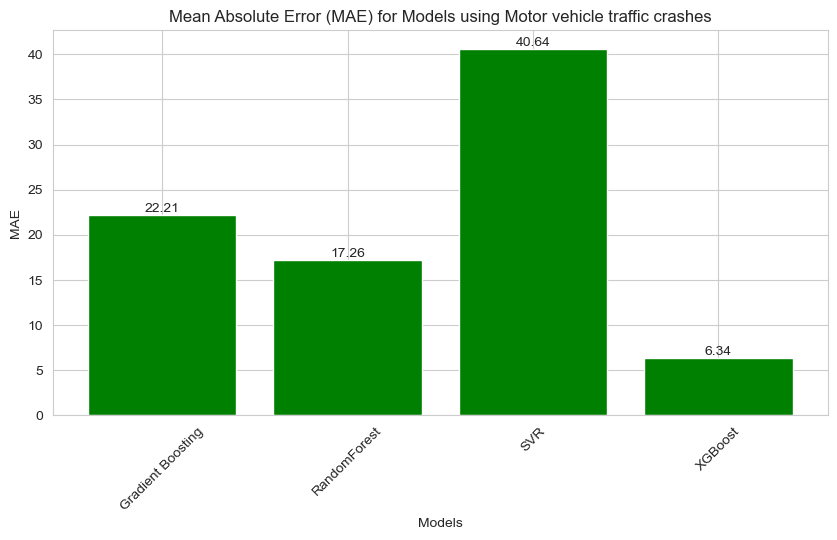

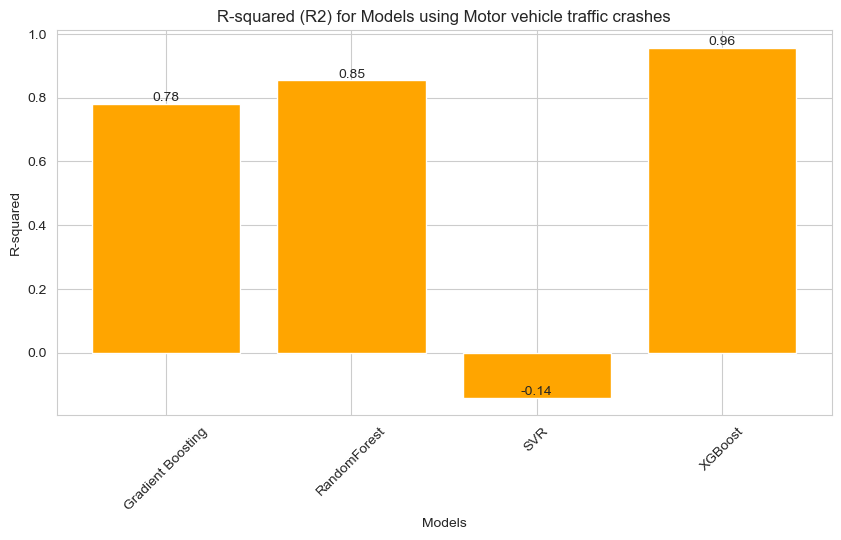

In [50]:


def predict_with_models(ardi_data, cause_of_death_value):
    # Encode categorical variables
    label_encoders = {}
    categorical_columns = ['LocationDesc', 'ConsumptionPattern', 'ConditionType', 'AgeGroup', 'Category']
    
    for col in categorical_columns:
        le = LabelEncoder()
        ardi_data[col] = le.fit_transform(ardi_data[col])
        label_encoders[col] = le

    # Filter data by cause_of_death value
    filtered_data = ardi_data[ardi_data['Cause_of_Death'] == cause_of_death_value]
    
    # Check if there are enough samples for training and testing
    if len(filtered_data) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    # Split data into features and target
    X = filtered_data[['LocationDesc', 'ConsumptionPattern', 'ConditionType', 'AgeGroup', 'Category']]
    y = filtered_data['Data_Value_Alt']
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize models
    models = {
        'Gradient Boosting': GradientBoostingRegressor(),
        'RandomForest': RandomForestRegressor(),
        'SVR': SVR(kernel='linear'),
        'XGBoost': XGBRegressor()
    }

    # Make predictions and evaluate each model
    mse_results = {}
    mae_results = {}
    r2_results = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mse_results[model_name] = mse
        mae_results[model_name] = mae
        r2_results[model_name] = r2

    # Plot MSE for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(mse_results.keys(), mse_results.values(), color='blue')
    plt.title(f'Mean Squared Error (MSE) for Models using {cause_of_death_value}')
    plt.xlabel('Models')
    plt.ylabel('MSE')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, mse in zip(bars, mse_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mse:.2f}', ha='center', va='bottom')

    plt.show()

    # Plot MAE for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(mae_results.keys(), mae_results.values(), color='green')
    plt.title(f'Mean Absolute Error (MAE) for Models using {cause_of_death_value}')
    plt.xlabel('Models')
    plt.ylabel('MAE')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, mae in zip(bars, mae_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mae:.2f}', ha='center', va='bottom')

    plt.show()

    # Plot R-squared for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(r2_results.keys(), r2_results.values(), color='orange')
    plt.title(f'R-squared (R2) for Models using {cause_of_death_value}')
    plt.xlabel('Models')
    plt.ylabel('R-squared')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, r2 in zip(bars, r2_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{r2:.2f}', ha='center', va='bottom')

    plt.show()

# Load your ARDI data
ardi_data = pd.read_csv("Cleaned_1_data.csv")

# Specify the cause_of_death value for filtering
cause_of_death_value = 'Motor vehicle traffic crashes'

# Perform prediction with models for the specified cause_of_death value
predict_with_models(ardi_data, cause_of_death_value)


## Prediction based on Consumption Pattern

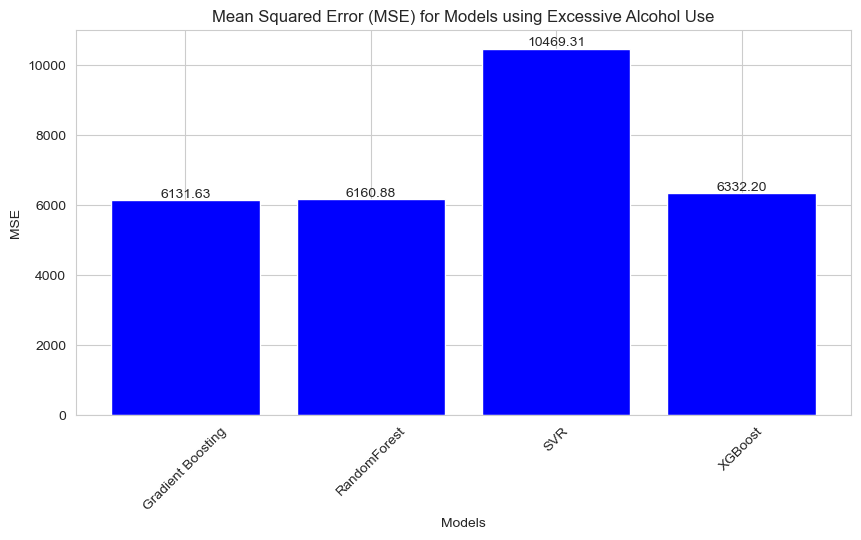

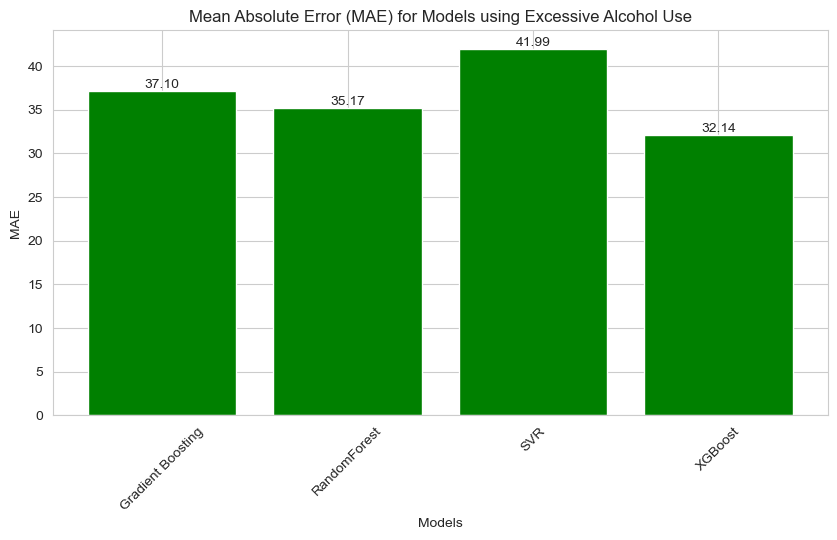

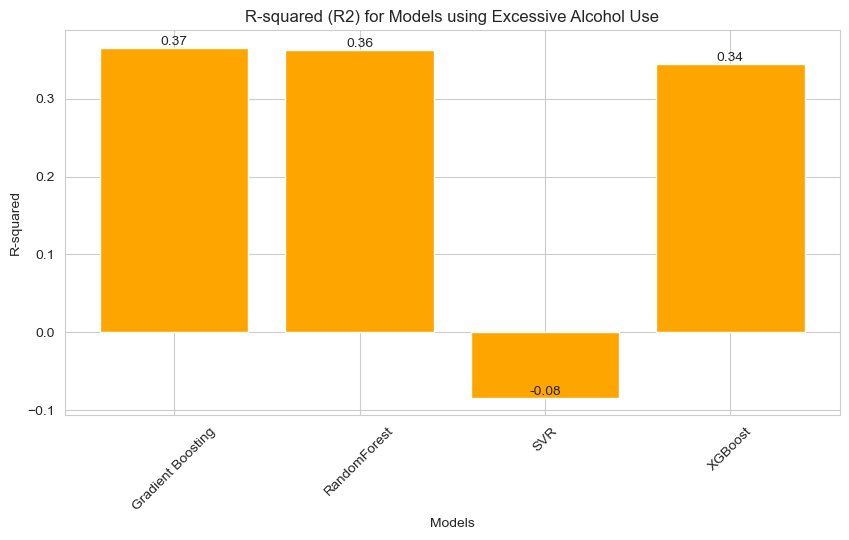

In [51]:


def predict_with_models(ardi_data, consumption_value):
    # Encode categorical variables
    label_encoders = {}
    categorical_columns = ['LocationDesc', 'ConditionType', 'AgeGroup', 'Category', 'Cause_of_Death']
    
    for col in categorical_columns:
        le = LabelEncoder()
        ardi_data[col] = le.fit_transform(ardi_data[col])
        label_encoders[col] = le

    # Filter data by consumption value
    filtered_data = ardi_data[ardi_data['ConsumptionPattern'] == consumption_value]
    
    # Check if there are enough samples for training and testing
    if len(filtered_data) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    # Split data into features and target
    X = filtered_data[['LocationDesc', 'ConditionType', 'AgeGroup', 'Category', 'Cause_of_Death']]
    y = filtered_data['Data_Value_Alt']
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize models
    models = {
        'Gradient Boosting': GradientBoostingRegressor(),
        'RandomForest': RandomForestRegressor(),
        'SVR': SVR(kernel='linear'),
        'XGBoost': XGBRegressor()
    }

    # Make predictions and evaluate each model
    mse_results = {}
    mae_results = {}
    r2_results = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mse_results[model_name] = mse
        mae_results[model_name] = mae
        r2_results[model_name] = r2

    # Plot MSE for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(mse_results.keys(), mse_results.values(), color='blue')
    plt.title(f'Mean Squared Error (MSE) for Models using {consumption_value}')
    plt.xlabel('Models')
    plt.ylabel('MSE')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, mse in zip(bars, mse_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mse:.2f}', ha='center', va='bottom')

    plt.show()

    # Plot MAE for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(mae_results.keys(), mae_results.values(), color='green')
    plt.title(f'Mean Absolute Error (MAE) for Models using {consumption_value}')
    plt.xlabel('Models')
    plt.ylabel('MAE')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, mae in zip(bars, mae_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mae:.2f}', ha='center', va='bottom')

    plt.show()

    # Plot R-squared for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(r2_results.keys(), r2_results.values(), color='orange')
    plt.title(f'R-squared (R2) for Models using {consumption_value}')
    plt.xlabel('Models')
    plt.ylabel('R-squared')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, r2 in zip(bars, r2_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{r2:.2f}', ha='center', va='bottom')

    plt.show()

# Load your ARDI data
ardi_data = pd.read_csv("Cleaned_1_data.csv")

# Specify the consumption value for filtering
consumption_value = 'Excessive Alcohol Use'

# Perform prediction with models for the specified consumption value
predict_with_models(ardi_data, consumption_value)


## Prediction based on Category

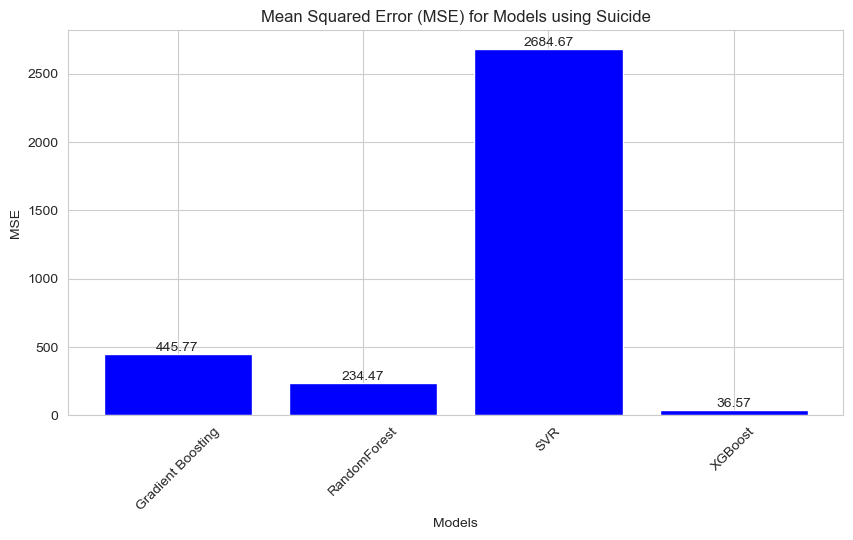

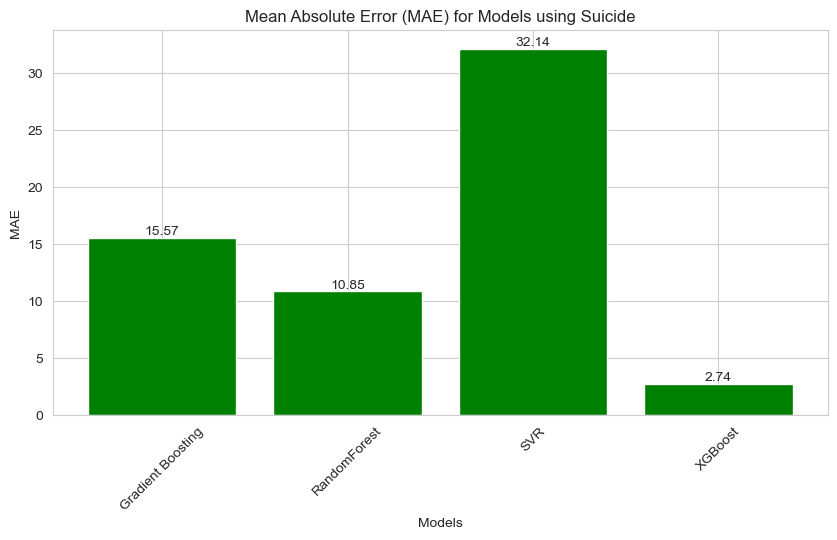

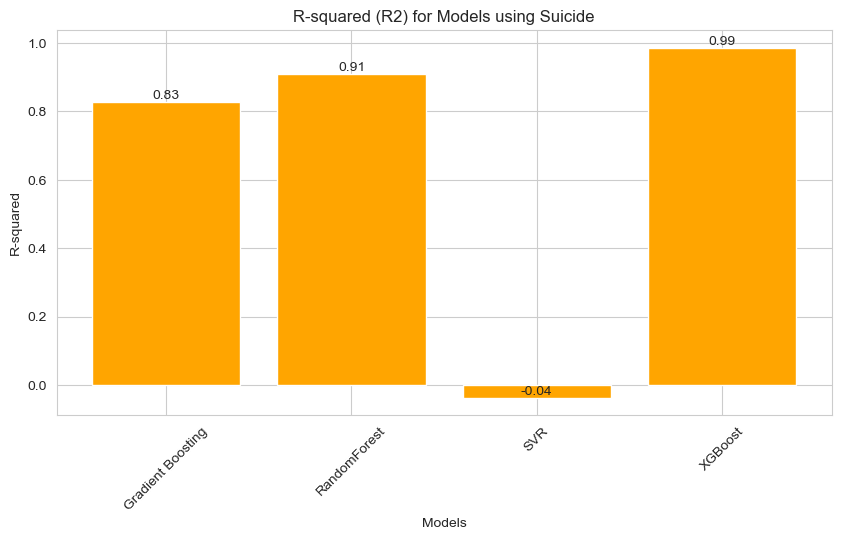

In [52]:


def predict_with_models(ardi_data, category_value):
    # Encode categorical variables
    label_encoders = {}
    categorical_columns = ['LocationDesc', 'ConsumptionPattern', 'ConditionType', 'AgeGroup', 'Cause_of_Death']
    
    for col in categorical_columns:
        le = LabelEncoder()
        ardi_data[col] = le.fit_transform(ardi_data[col])
        label_encoders[col] = le

    # Filter data by category value
    filtered_data = ardi_data[ardi_data['Category'] == category_value]
    
    # Check if there are enough samples for training and testing
    if len(filtered_data) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    # Split data into features and target
    X = filtered_data[['LocationDesc', 'ConsumptionPattern', 'ConditionType', 'AgeGroup', 'Cause_of_Death']]
    y = filtered_data['Data_Value_Alt']
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize models
    models = {
        'Gradient Boosting': GradientBoostingRegressor(),
        'RandomForest': RandomForestRegressor(),
        'SVR': SVR(kernel='linear'),
        'XGBoost': XGBRegressor()
    }

    # Make predictions and evaluate each model
    mse_results = {}
    mae_results = {}
    r2_results = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mse_results[model_name] = mse
        mae_results[model_name] = mae
        r2_results[model_name] = r2

    # Plot MSE for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(mse_results.keys(), mse_results.values(), color='blue')
    plt.title(f'Mean Squared Error (MSE) for Models using {category_value}')
    plt.xlabel('Models')
    plt.ylabel('MSE')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, mse in zip(bars, mse_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mse:.2f}', ha='center', va='bottom')

    plt.show()

    # Plot MAE for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(mae_results.keys(), mae_results.values(), color='green')
    plt.title(f'Mean Absolute Error (MAE) for Models using {category_value}')
    plt.xlabel('Models')
    plt.ylabel('MAE')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, mae in zip(bars, mae_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mae:.2f}', ha='center', va='bottom')

    plt.show()

    # Plot R-squared for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(r2_results.keys(), r2_results.values(), color='orange')
    plt.title(f'R-squared (R2) for Models using {category_value}')
    plt.xlabel('Models')
    plt.ylabel('R-squared')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, r2 in zip(bars, r2_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{r2:.2f}', ha='center', va='bottom')

    plt.show()

# Load your ARDI data
ardi_data = pd.read_csv("Cleaned_1_data.csv")

# Specify the category value for filtering
category_value = 'Suicide'

# Perform prediction with models for the specified category value
predict_with_models(ardi_data, category_value)


## Prediction based on Age Group

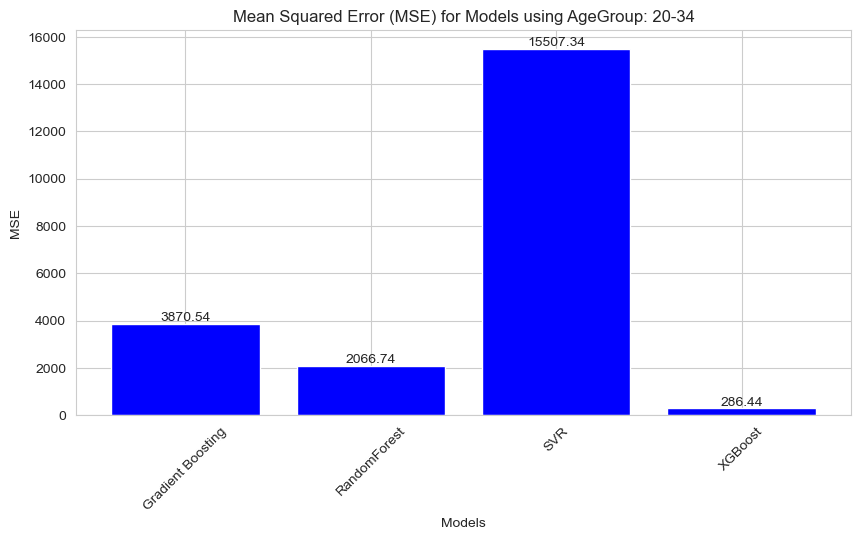

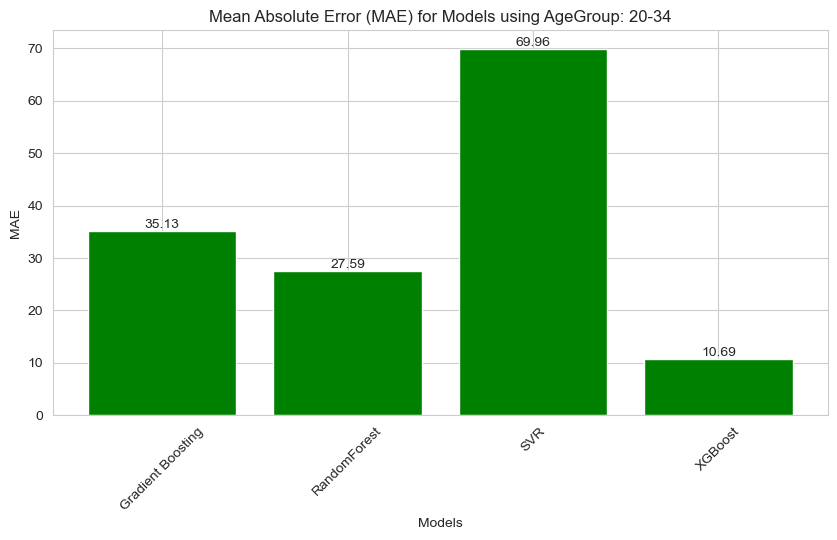

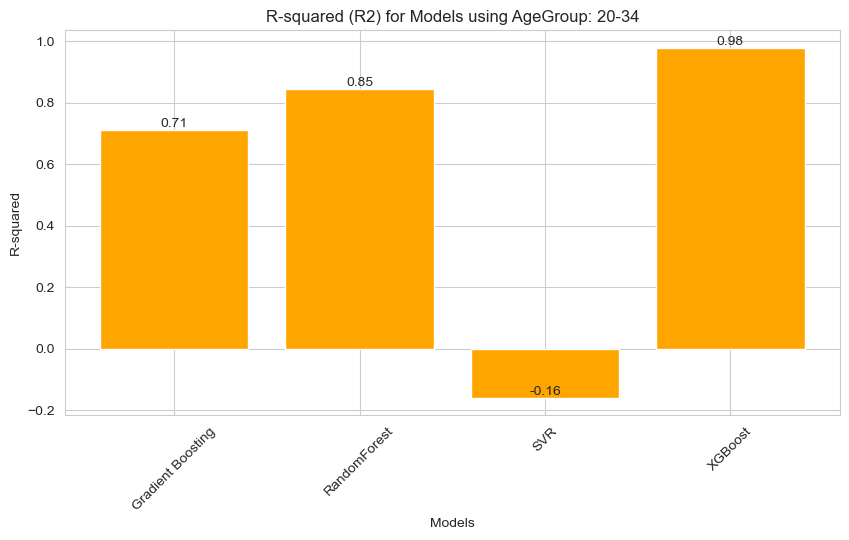

In [53]:

def predict_with_models(ardi_data, age_group):
    # Encode categorical variables
    label_encoders = {}
    categorical_columns = ['LocationDesc', 'ConsumptionPattern', 'ConditionType', 'Category', 'Cause_of_Death']
    
    for col in categorical_columns:
        le = LabelEncoder()
        ardi_data[col] = le.fit_transform(ardi_data[col])
        label_encoders[col] = le

    # Filter data by age group
    filtered_data = ardi_data[ardi_data['AgeGroup'] == age_group]
    
    # Check if there are enough samples for training and testing
    if len(filtered_data) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    # Split data into features and target
    X = filtered_data[['LocationDesc', 'ConsumptionPattern', 'ConditionType', 'Category', 'Cause_of_Death']]
    y = filtered_data['Data_Value_Alt']
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize models
    models = {
        'Gradient Boosting': GradientBoostingRegressor(),
        'RandomForest': RandomForestRegressor(),
        'SVR': SVR(kernel='linear'),
        'XGBoost': XGBRegressor()
    }

    # Make predictions and evaluate each model
    mse_results = {}
    mae_results = {}
    r2_results = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mse_results[model_name] = mse
        mae_results[model_name] = mae
        r2_results[model_name] = r2

    # Plot MSE for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(mse_results.keys(), mse_results.values(), color='blue')
    plt.title(f'Mean Squared Error (MSE) for Models using AgeGroup: {age_group}')
    plt.xlabel('Models')
    plt.ylabel('MSE')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, mse in zip(bars, mse_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mse:.2f}', ha='center', va='bottom')

    plt.show()

    # Plot MAE for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(mae_results.keys(), mae_results.values(), color='green')
    plt.title(f'Mean Absolute Error (MAE) for Models using AgeGroup: {age_group}')
    plt.xlabel('Models')
    plt.ylabel('MAE')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, mae in zip(bars, mae_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mae:.2f}', ha='center', va='bottom')

    plt.show()

    # Plot R-squared for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(r2_results.keys(), r2_results.values(), color='orange')
    plt.title(f'R-squared (R2) for Models using AgeGroup: {age_group}')
    plt.xlabel('Models')
    plt.ylabel('R-squared')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, r2 in zip(bars, r2_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{r2:.2f}', ha='center', va='bottom')

    plt.show()

# Load your ARDI data
ardi_data = pd.read_csv("Cleaned_1_data.csv")

# Specify the age group for filtering
age_group = '20-34'

# Perform prediction with models for the specified age group
predict_with_models(ardi_data, age_group)
